In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import collections
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_cars_dekho.csv')

In [3]:
# df.head()
df.columns

Index(['myear', 'body', 'transmission', 'fuel', 'km', 'ip', 'threesixty',
       'oem', 'model', 'variant', 'selling_price', 'utype', 'carType', 'color',
       'engine_type', 'no_of_cylinder', 'valves_per_cylinder', 'turbo_charger',
       'super_charger', 'wheel_base', 'front_tread', 'rear_tread',
       'kerb_weight', 'gross_weight', 'gear_box', 'seats', 'steering_type',
       'turning_radius', 'front_brake_type', 'rear_brake_type', 'top_speed',
       'acceleration', 'tyre_type', 'doors', 'cargo_volume', 'model_type_new',
       'exterior_color', 'owner_type', 'max_power_delivered',
       'max_torque_delivered', 'feature_score'],
      dtype='object')

In [4]:
# df.info()

In [5]:
numerical_features = df.select_dtypes(exclude='object').columns
categorical_features =  df.select_dtypes(include=['object','bool']).columns
print(numerical_features)
print(categorical_features)

Index(['myear', 'km', 'ip', 'threesixty', 'selling_price', 'no_of_cylinder',
       'valves_per_cylinder', 'turbo_charger', 'super_charger', 'wheel_base',
       'front_tread', 'rear_tread', 'kerb_weight', 'gross_weight', 'seats',
       'turning_radius', 'top_speed', 'acceleration', 'doors', 'cargo_volume',
       'max_power_delivered', 'max_torque_delivered', 'feature_score'],
      dtype='object')
Index(['body', 'transmission', 'fuel', 'threesixty', 'oem', 'model', 'variant',
       'utype', 'carType', 'color', 'engine_type', 'turbo_charger',
       'super_charger', 'gear_box', 'steering_type', 'front_brake_type',
       'rear_brake_type', 'tyre_type', 'model_type_new', 'exterior_color',
       'owner_type'],
      dtype='object')


In [6]:
#  categorical feature encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoding_df = df.copy()

for column in categorical_features:
    encoding_df[column] = le.fit_transform(encoding_df[column])
encoding_df.head()

,myear,body,transmission,fuel,km,ip,threesixty,oem,model,variant,...,acceleration,tyre_type,doors,cargo_volume,model_type_new,exterior_color,owner_type,max_power_delivered,max_torque_delivered,feature_score
0,2016,2,1,0,69162.0,0,0,29,223,2179,...,15.90,2,5,180,0,621,1,58.16,77.0,22
1,2015,2,1,0,45864.0,0,0,29,197,1926,...,15.05,3,5,235,0,277,1,58.20,78.0,24
2,2015,8,1,0,81506.0,0,0,15,85,2559,...,15.00,3,4,400,0,621,3,86.70,109.0,24
3,2013,2,1,0,115893.0,0,0,29,223,2179,...,10.00,3,4,510,0,621,3,58.20,77.0,17
4,2022,6,1,0,18900.0,0,0,29,204,3075,...,10.00,3,5,510,0,737,1,86.63,121.5,21


In [7]:
encoding_df.to_csv('encoded_cars_data.csv', index=False)

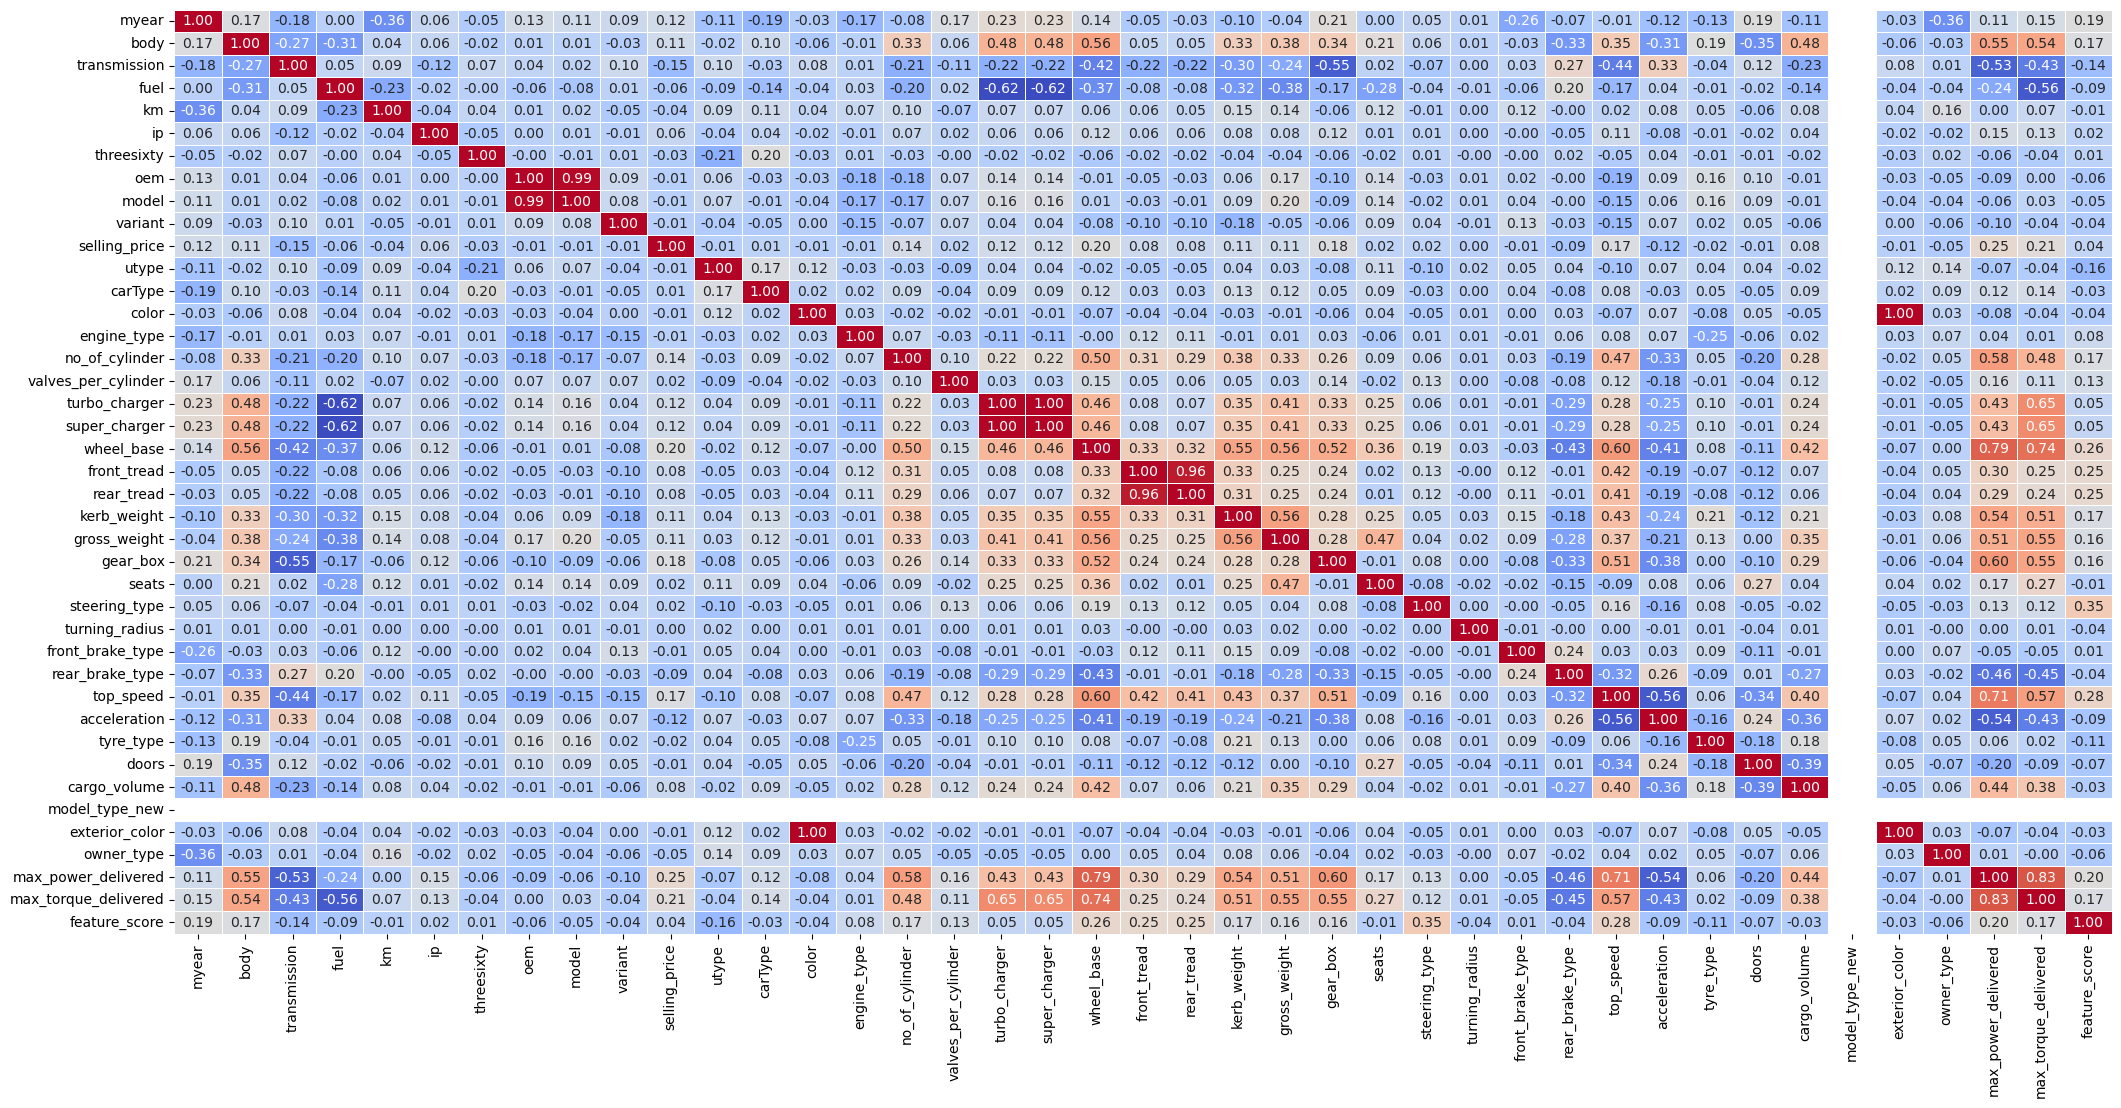

In [8]:
corre = encoding_df.corr(numeric_only=True)
plt.figure(figsize=(25, 12)) 
sns.heatmap(corre, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=None)
plt.savefig("my_plot.png", dpi=300, bbox_inches='tight')
plt.show()


### Features selected
* `myear`
* `oem`
* `model`
* `gear_box`
* `seats`
* `steering_type`
* `no_of_cylinder`
* `super_charger`
* `top_speed`
* `max_power_delivered`
* `max_torque_delivered`
* `feature_score`


# analyzing fetaurs data


In [11]:
# To remove extrem outliers
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['selling_price'] >= lower_bound) & (df['selling_price'] <= upper_bound)]

In [12]:
# Year analysis
df['myear'].unique()

array([2016, 2015, 2013, 2022, 2012, 2010, 2017, 2021, 2011, 2018, 2019,
       2014, 2020, 2006, 2002, 2003, 2009, 2001, 2023, 2008, 2005, 2007,
       2000, 1997, 1993, 2004, 1990, 1989, 1999, 1994, 1998, 1986, 1983,
       1996], dtype=int64)

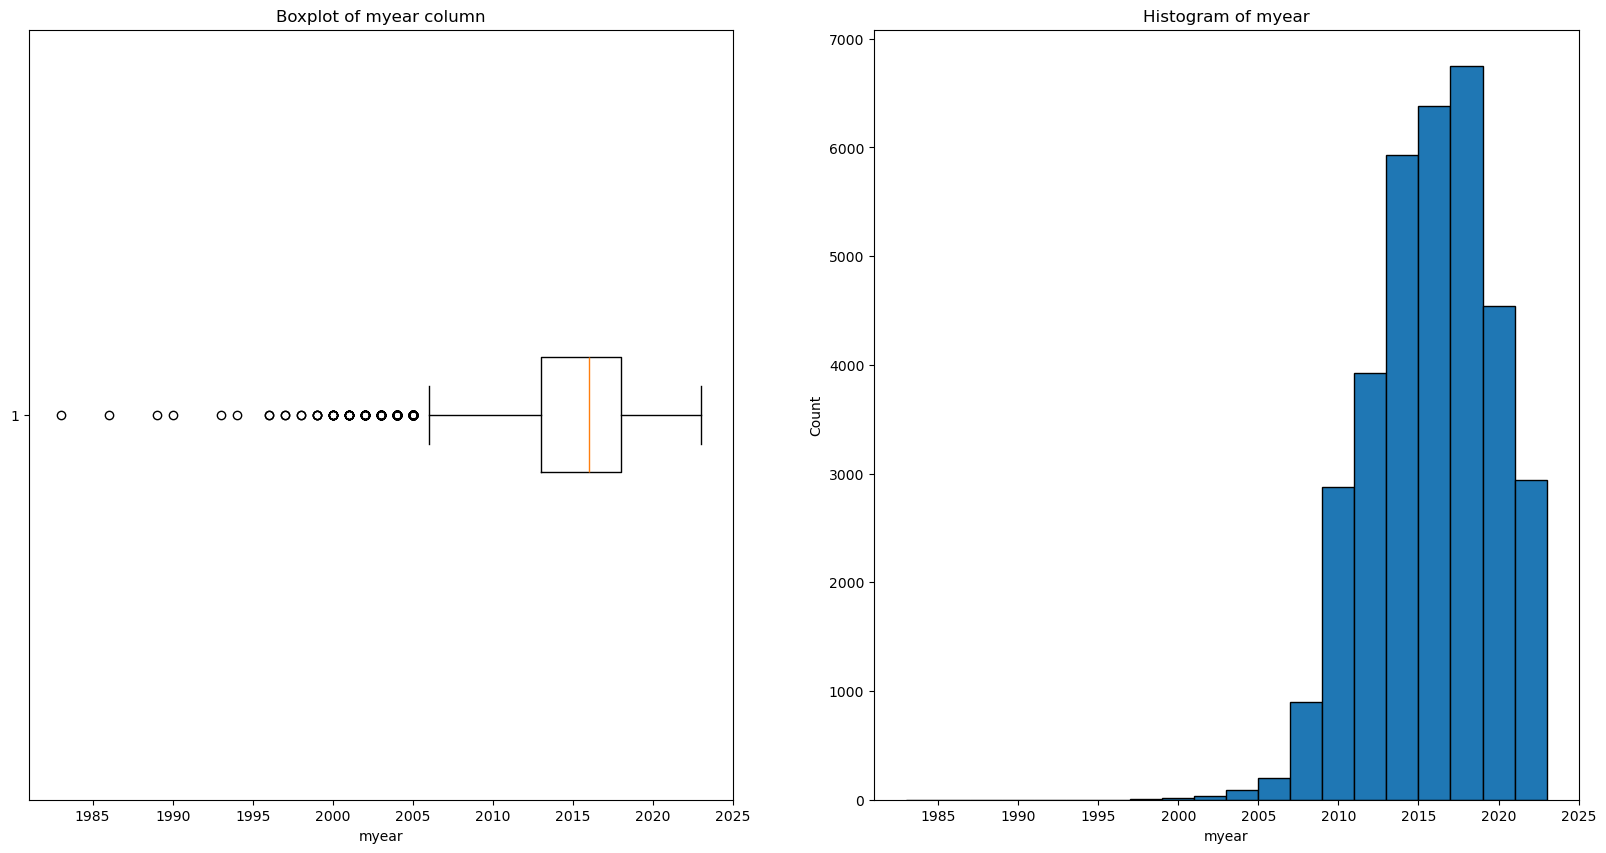

In [13]:
f,ax=plt.subplots(1,2,figsize=(20,10))

ax[0].boxplot(df['myear'], vert=False)
ax[0].set_xlabel('myear')
ax[0].set_title('Boxplot of myear column')

ax[1].hist(df['myear'], bins=20, edgecolor='black')
ax[1].set_xlabel('myear')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of myear')
plt.show()

In [14]:
# below yaer 2005 has more outliers and this data is not latest, so we can remove from the list to make the model train with latest data
# cleaning myear data
lessThan2005 =df[ df['myear'] < 2005]
print(lessThan2005.shape)
print(df.shape)

(146, 41)
(34564, 41)


In [15]:
df = df.drop(df[df['myear'] < 2005].index)
print(df.shape)

(34418, 41)


In [16]:
oemUniq = df['oem'].unique()
oemUniq

array(['maruti', 'honda', 'hyundai', 'tata', 'toyota', 'bajaj',
       'mahindra', 'chevrolet', 'renault', 'nissan', 'datsun', 'kia',
       'force', 'icml', 'ashok leyland', 'bmw', 'volvo', 'isuzu', 'ford',
       'volkswagen', 'skoda', 'mercedes-benz', 'audi', 'mg', 'jeep',
       'fiat', 'land rover', 'jaguar', 'mitsubishi', 'mahindra ssangyong',
       'mini', 'porsche', 'mahindra renault', 'citroen',
       'hindustan motors', 'premier', 'opel'], dtype=object)

In [17]:
oemCounts = { x: df['oem'].value_counts().get(x, 0) for x in oemUniq}
oemOrder = [ x[0] for x in sorted(oemCounts.items(), key=lambda item : item[1], reverse=True) ]
oemOrder

['maruti',
 'hyundai',
 'honda',
 'mahindra',
 'tata',
 'renault',
 'ford',
 'volkswagen',
 'toyota',
 'skoda',
 'chevrolet',
 'nissan',
 'kia',
 'datsun',
 'audi',
 'mercedes-benz',
 'bmw',
 'fiat',
 'jeep',
 'mg',
 'mitsubishi',
 'volvo',
 'mahindra ssangyong',
 'isuzu',
 'mahindra renault',
 'jaguar',
 'land rover',
 'force',
 'mini',
 'bajaj',
 'icml',
 'hindustan motors',
 'premier',
 'ashok leyland',
 'porsche',
 'citroen',
 'opel']

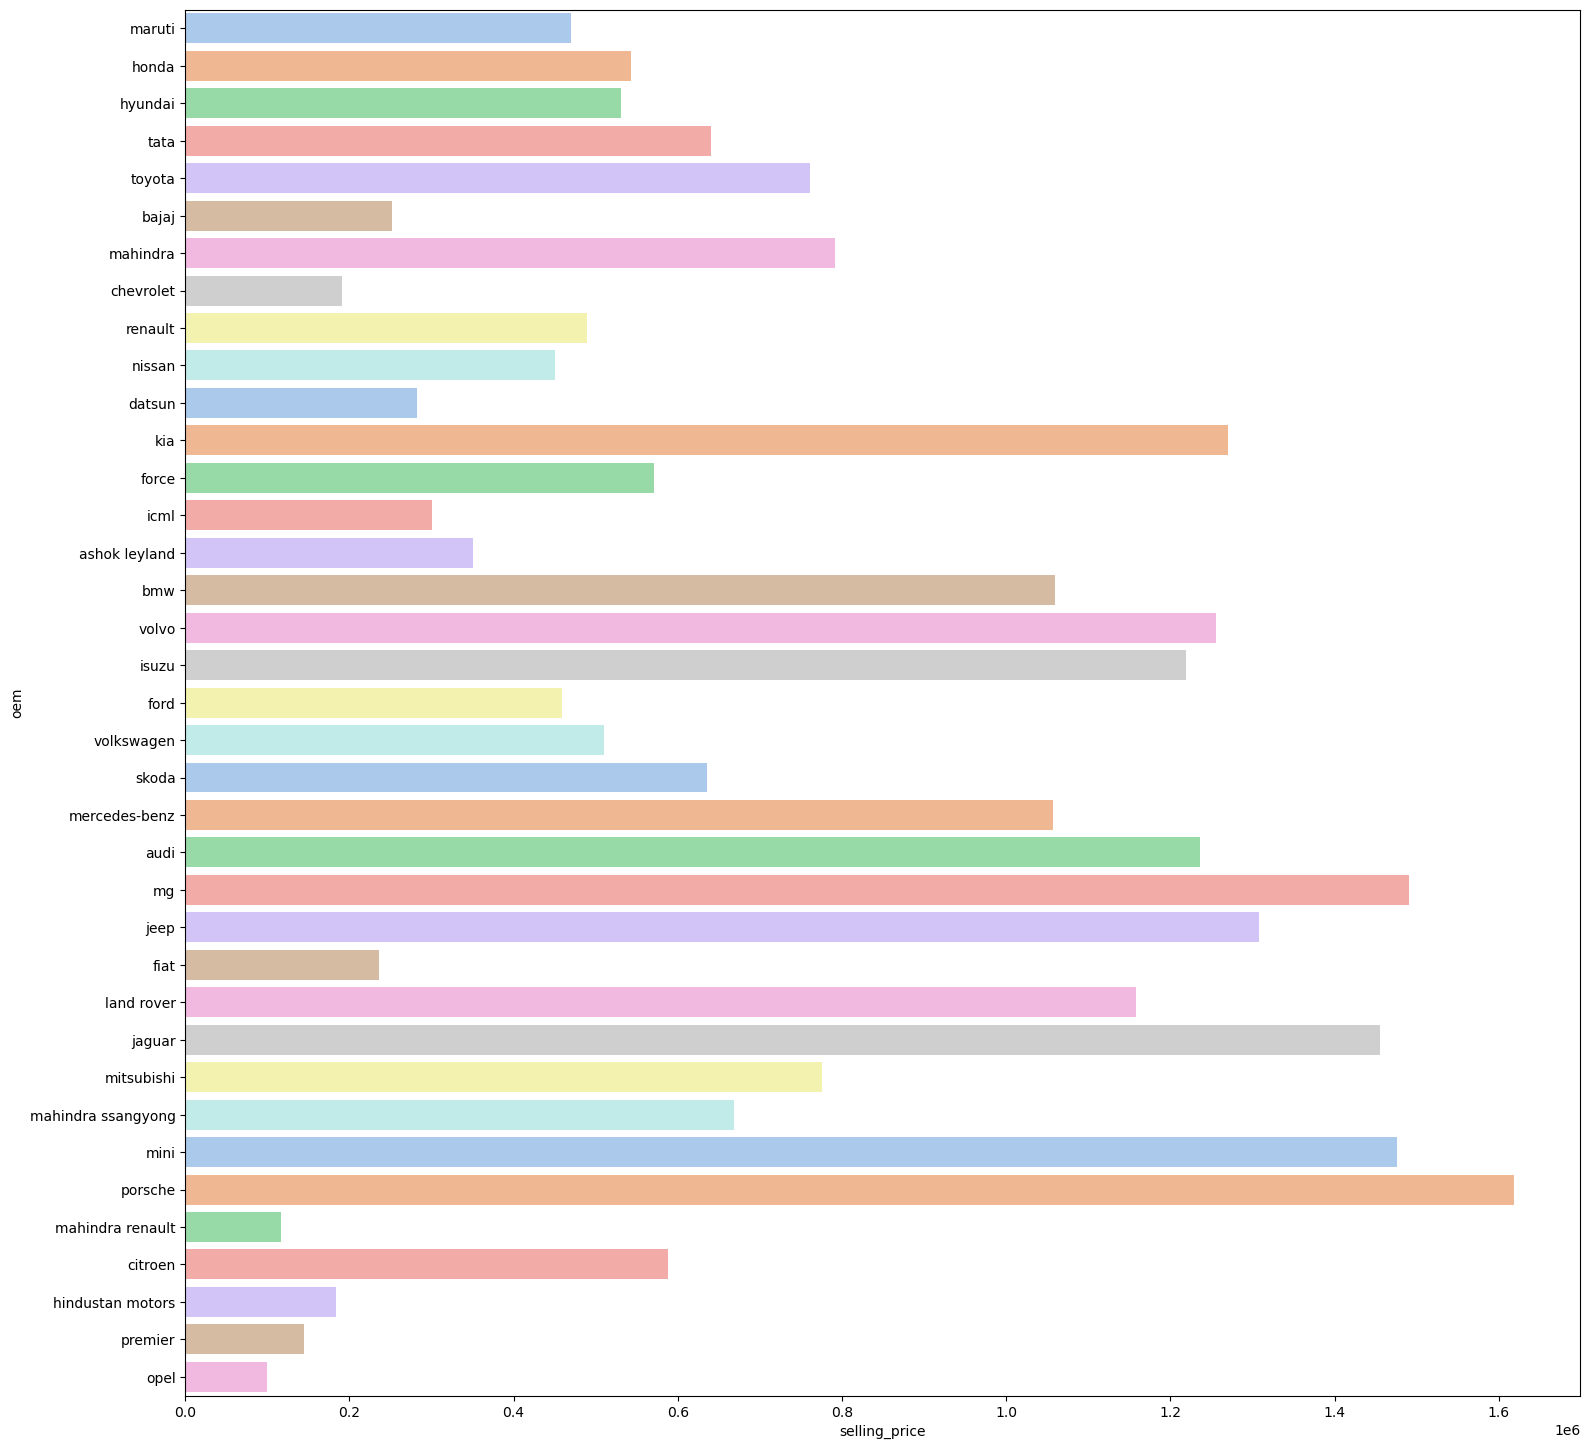

In [18]:
f,ax=plt.subplots(figsize=(18,18))
palatte = sns.color_palette("pastel")
sns.barplot(data=df, x='selling_price', y='oem' , ax=ax, palette=palatte, estimator='mean', errorbar=None)
plt.show()

- Luxury brands (Porsche, Jaguar, MG) command the highest average prices.
- Mahindra, Fait, Bajaj tend to have lower average prices, aligning with their budget-oriented segment.

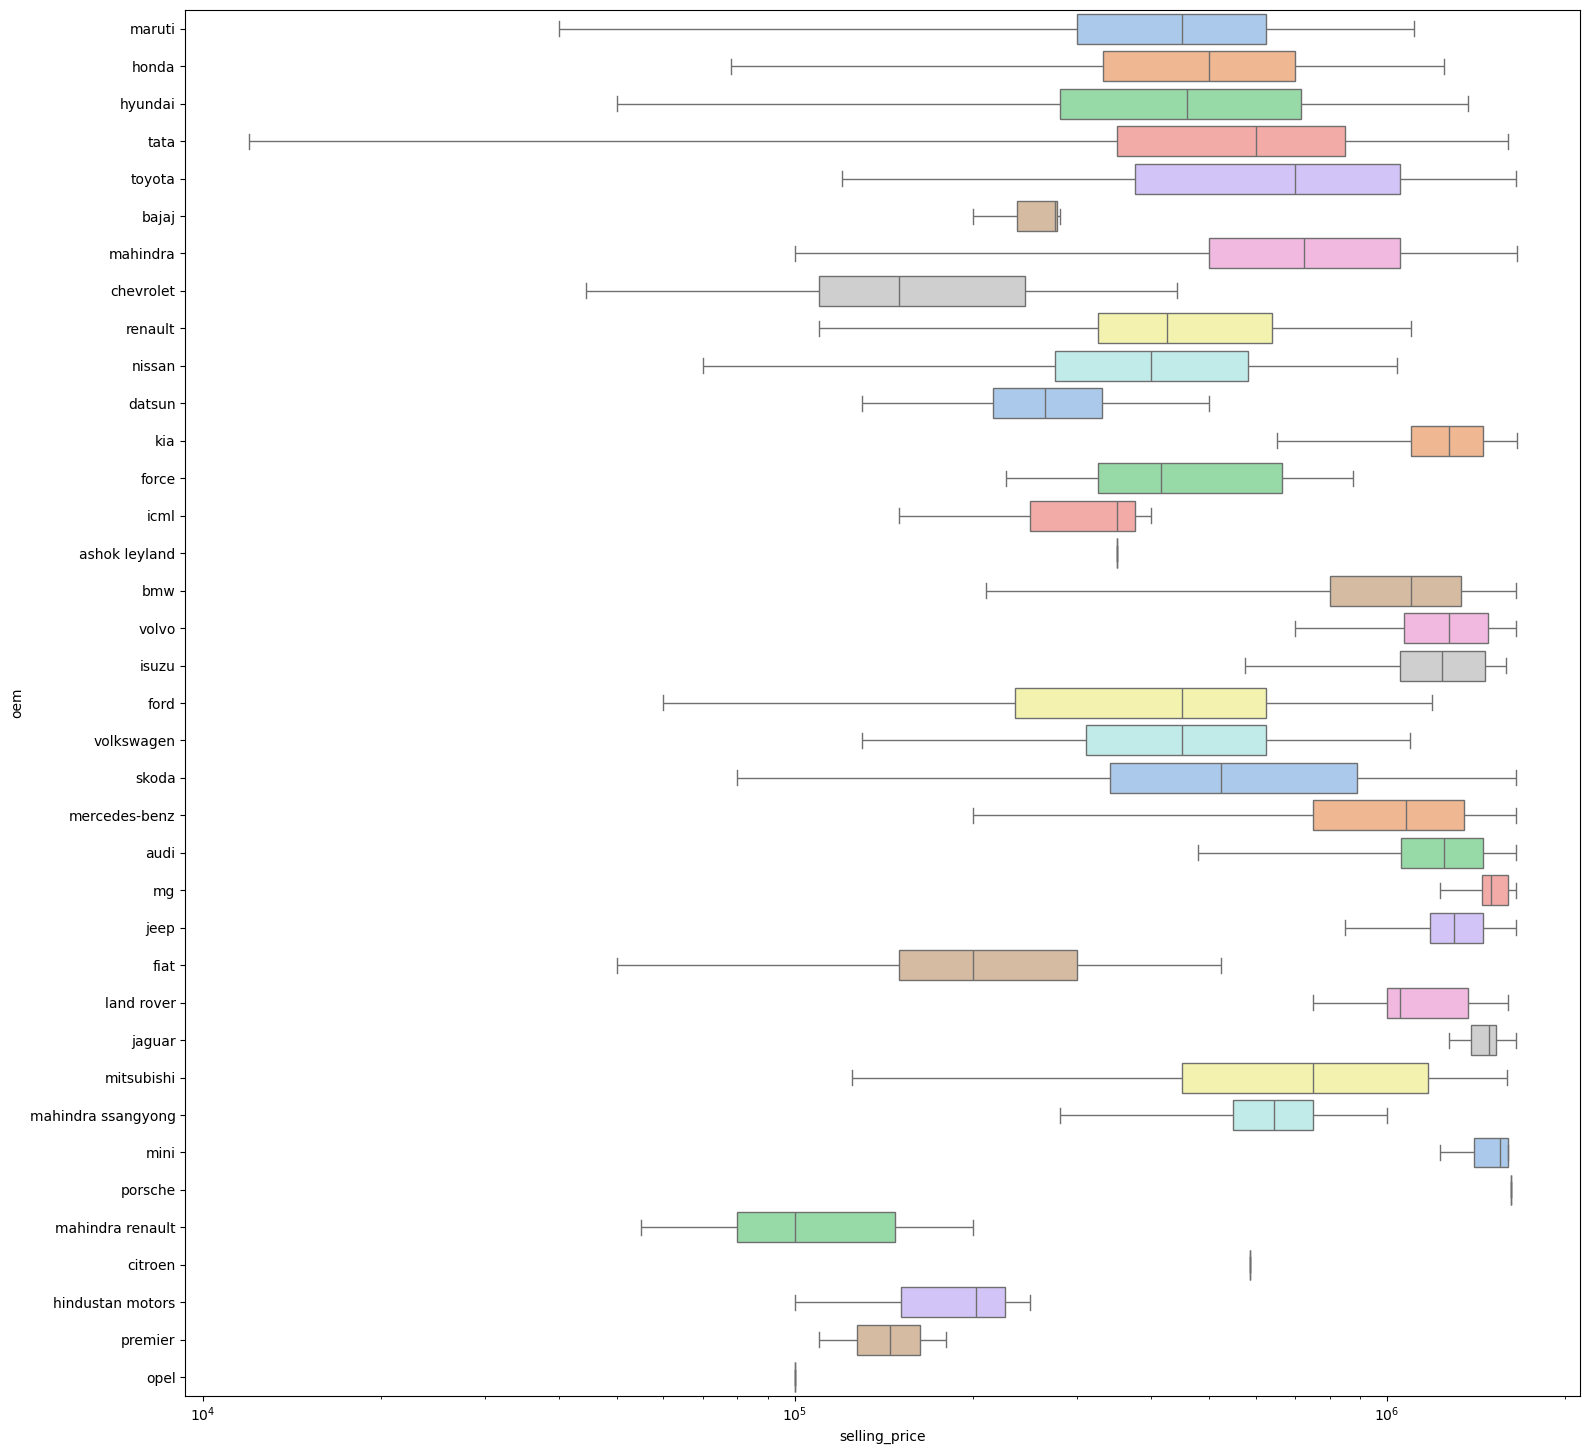

In [20]:
f,ax=plt.subplots(figsize=(18,18))
palatte = sns.color_palette("pastel")
sns.boxplot(data=df, x='selling_price', y='oem' , ax=ax, vert=False, palette=palatte,showfliers=False)
plt.xscale("log")
plt.show()

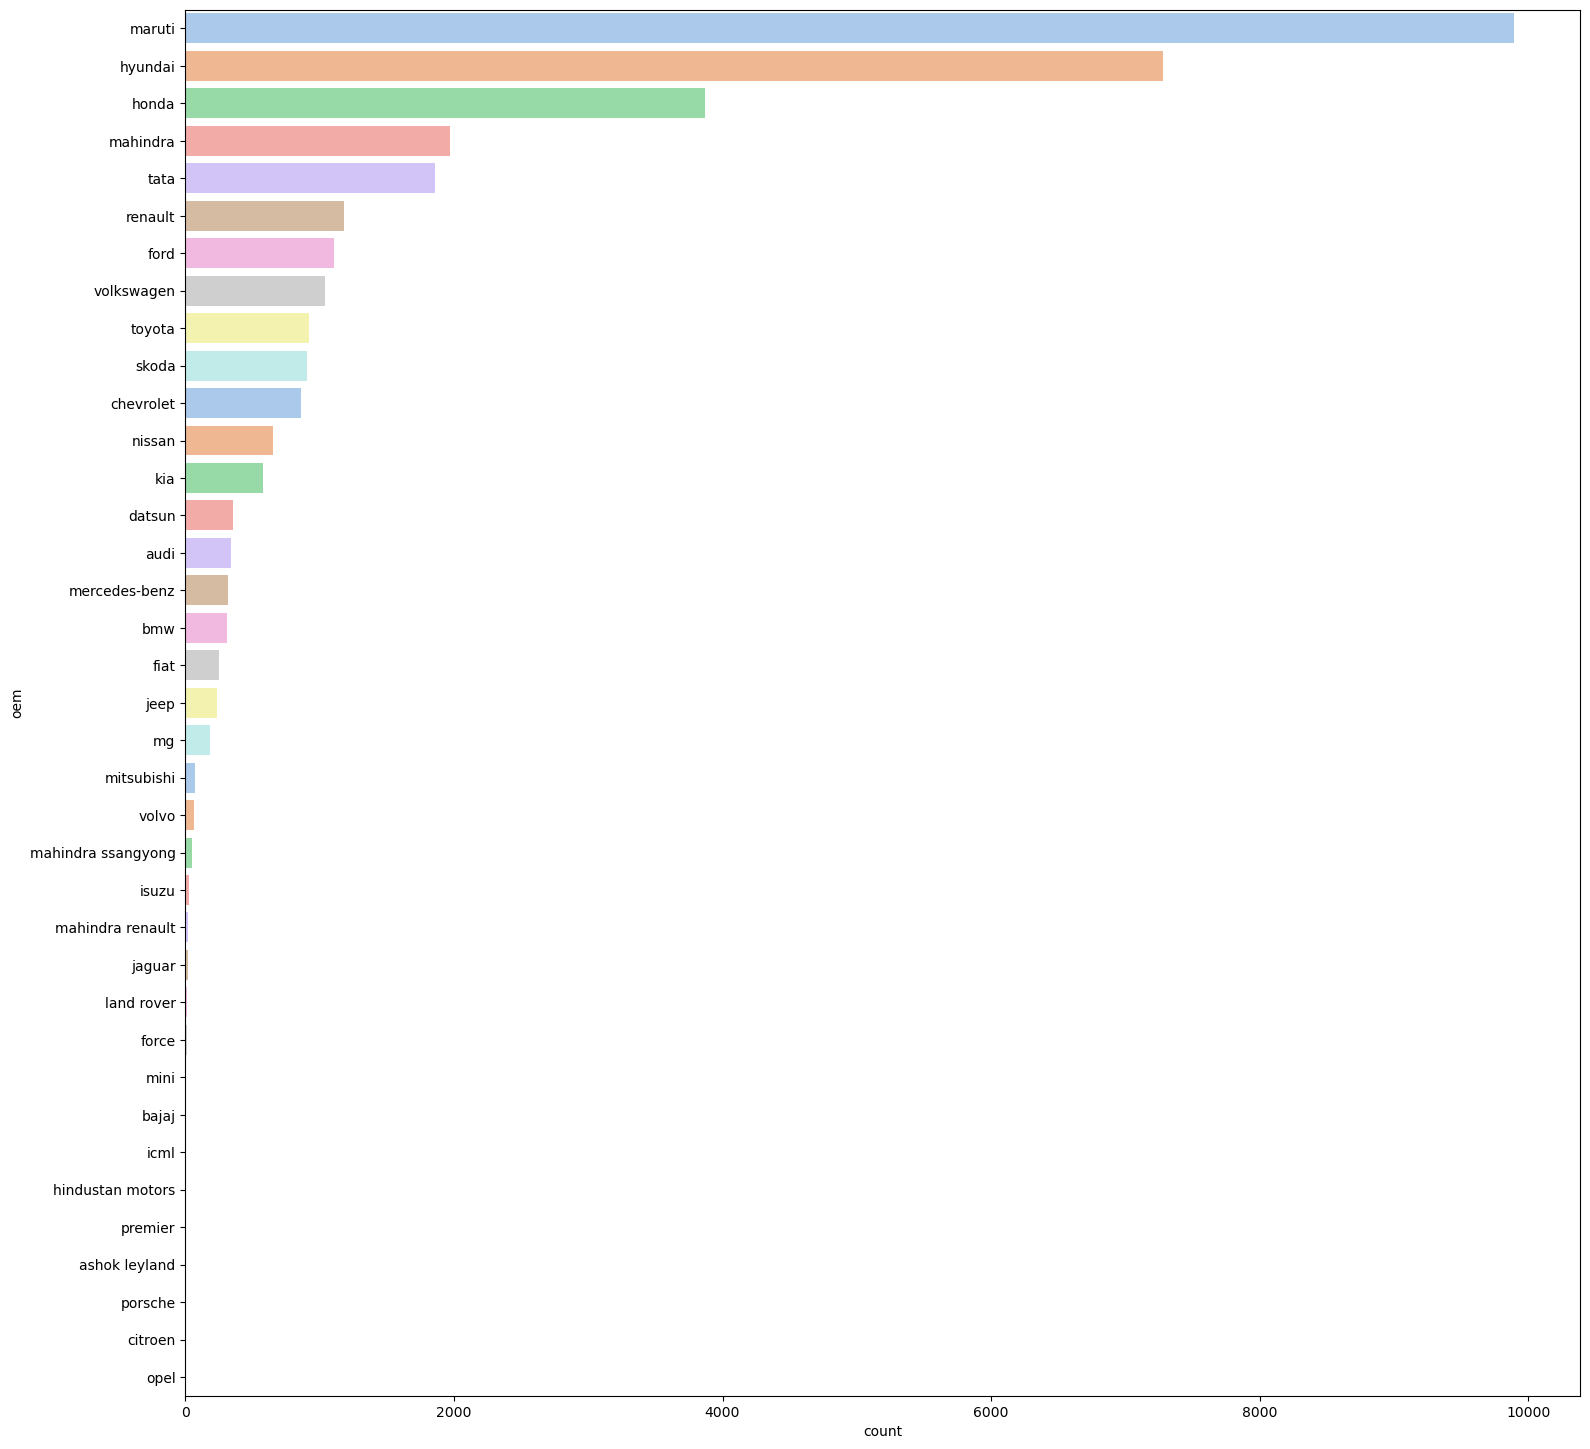

In [21]:
# oem feature
f,ax=plt.subplots(figsize=(18,18))
palatte = sns.color_palette("pastel")
sns.countplot(data=df, y='oem', ax=ax, palette=palatte, order=oemOrder)
plt.show()

- Maruti, Hyundai, Honda, and Mahindra dominate the used car market with the highest number of listings.
- Luxury brands like BMW, Mercedes-Benz, and Audi also have significant representation.

In [23]:
# model 
modelUniq = df['model'].unique()
print(len(modelUniq))
modelUniq

289


array(['maruti wagon r', 'maruti celerio', 'honda amaze', 'maruti ertiga',
       'maruti alto', 'hyundai grand i10', 'maruti ertiga tour',
       'maruti swift dzire tour', 'maruti eeco', 'hyundai santro',
       'maruti estilo', 'maruti eeco cargo', 'maruti alto k10',
       'maruti alto 800', 'hyundai aura', 'hyundai grand i10 nios',
       'honda city', 'tata tiago', 'hyundai accent',
       'hyundai santro xing', 'maruti zen estilo', 'tata nano',
       'maruti celerio tour 2018-2021', 'toyota corolla altis',
       'tata tigor', 'maruti xl6', 'hyundai xcent prime', 'maruti sx4',
       'bajaj re60', 'maruti swift dzire',
       'mahindra bolero maxi truck plus', 'maruti omni', 'tata tiago nrg',
       'mahindra kuv 100 nxt', 'hyundai xcent', 'maruti s-presso',
       'tata indigo', 'chevrolet aveo', 'maruti swift', 'hyundai i10',
       'hyundai eon', 'chevrolet spark', 'tata indica', 'maruti 800',
       'chevrolet beat', 'mahindra e2o', 'tata tigor ev',
       'tata nexon ev pr

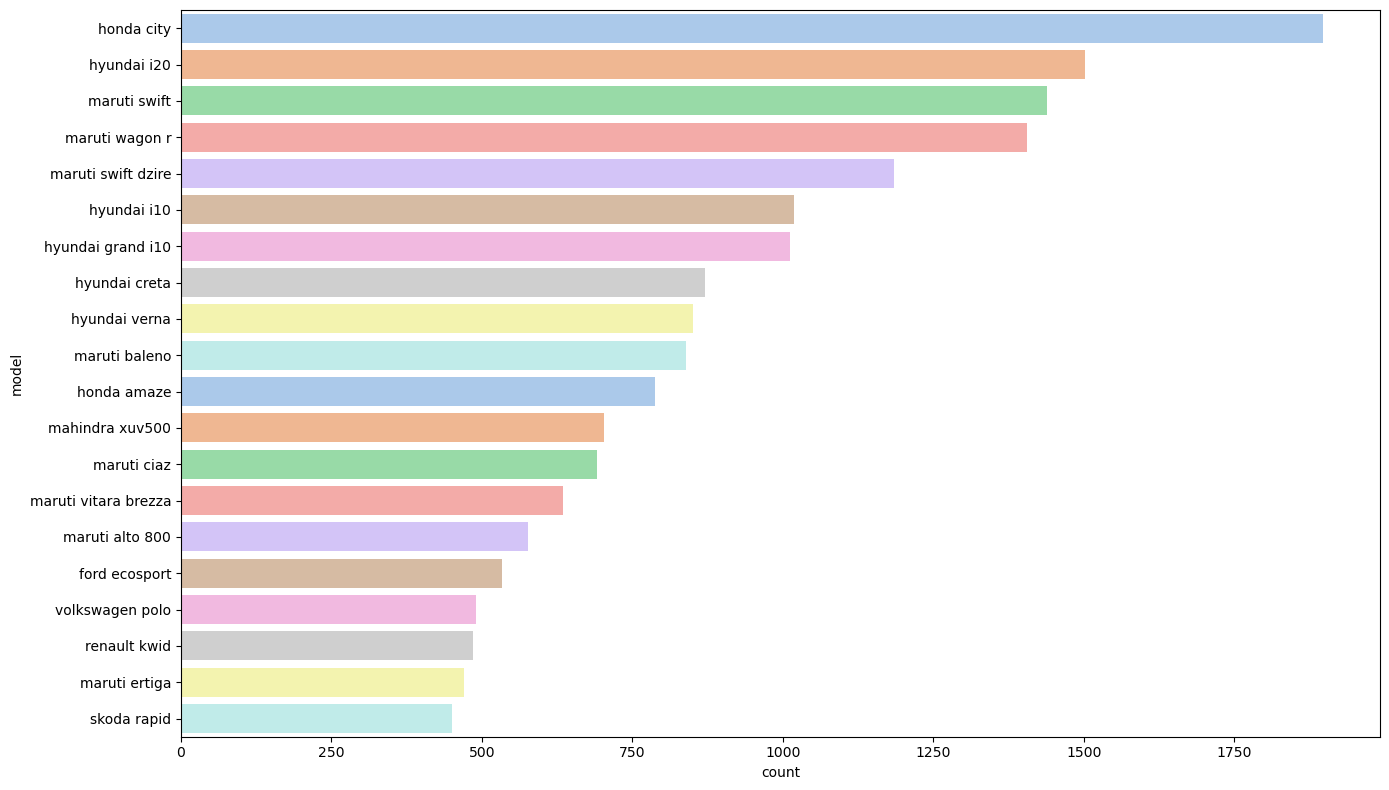

In [24]:
 # Count of each model and average selling price
modelCounts = df['model'].value_counts()

# Filter top models with more than 50 listings
topModels = modelCounts[modelCounts > 50].index
plt.figure(figsize=(14, 8))
dfModelTop = df[df['model'].isin(topModels[:20])]
sns.countplot(data=dfModelTop, y='model', order=topModels[:20], palette=palatte)
plt.tight_layout()
plt.show()

- Honda city, Hyundai i20, Maruti Swift are dominated models in used car market with the highest number of listings
- Hyundai, Maruthi models are dominating the used cars market

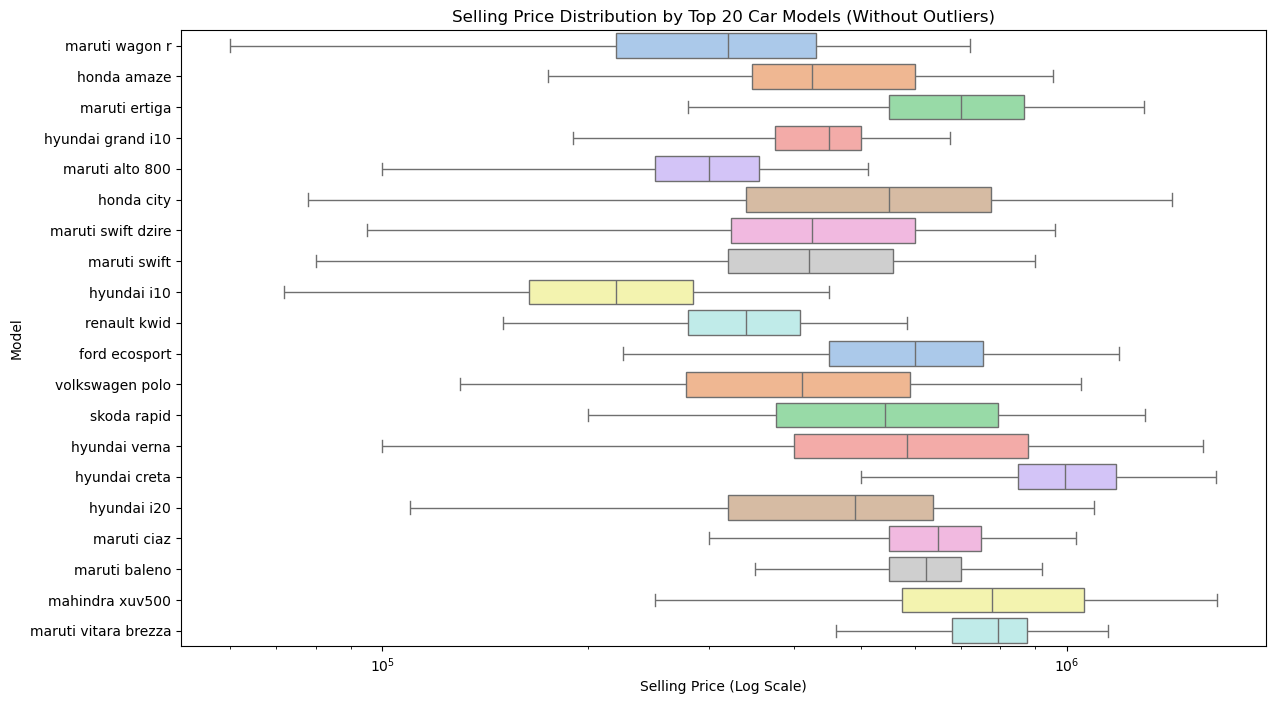

In [26]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['model'].isin(topModels[:20])], x="selling_price", y="model", showfliers=False, palette=palatte)
plt.xscale("log")
plt.xlabel("Selling Price (Log Scale)")
plt.ylabel("Model")
plt.title("Selling Price Distribution by Top 20 Car Models (Without Outliers)")
plt.show()

- Honda City, Maruthi Wagon R, Volkswagen polo, Skoda Rapid, Hyundai Verna have higher price ranges.
- Maruthi Wagon R, Maruthi Alto 800, Hyundai i10 and Renault Kwid are generally more affordable.
- Wide price variation within each car model

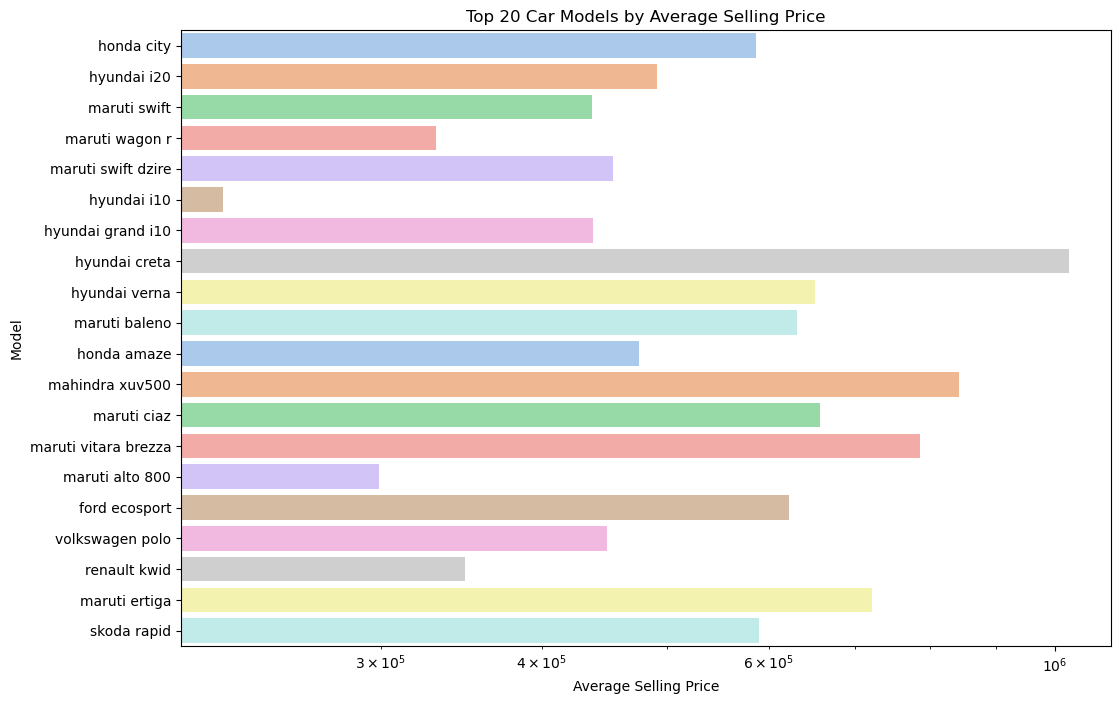

In [28]:
avgPriceByModel = df.groupby("model")["selling_price"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=avgPriceByModel[topModels][:20], y=avgPriceByModel[topModels].index[:20], palette=palatte)
plt.xlabel("Average Selling Price")
plt.ylabel("Model")
plt.title("Top 20 Car Models by Average Selling Price")
plt.xscale("log")
plt.show()


- Hyundai Creta, Mahindra XUV500, Maruthi Brezza are having highest average selling price
- Hynndai i10, Maruthi Alto 800, Maruthi Wagon R, are having lowest avergae selling price

<Axes: xlabel='count', ylabel='gear_box'>

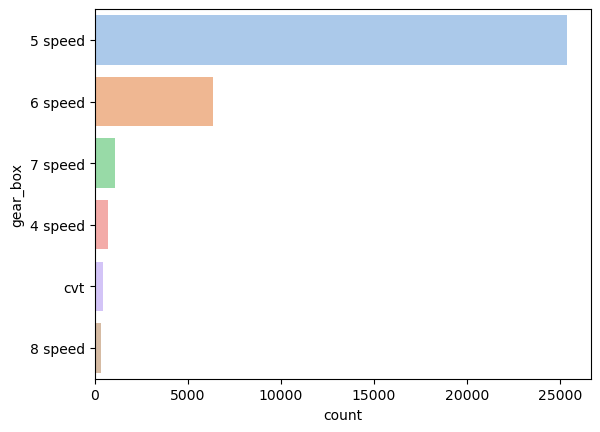

In [30]:
# gear_box
df['gear_box'].unique()
gearBoxCount = df['gear_box'].value_counts()
topGearBoxs = gearBoxCount[gearBoxCount > 50].index
# print(gearBoxCount)
sns.countplot(y='gear_box', data=df, palette=palatte, order=topGearBoxs)
# plt.tight_layout()
# plt.show()

- 5 and 6 gear box engines are more freqent in used car market


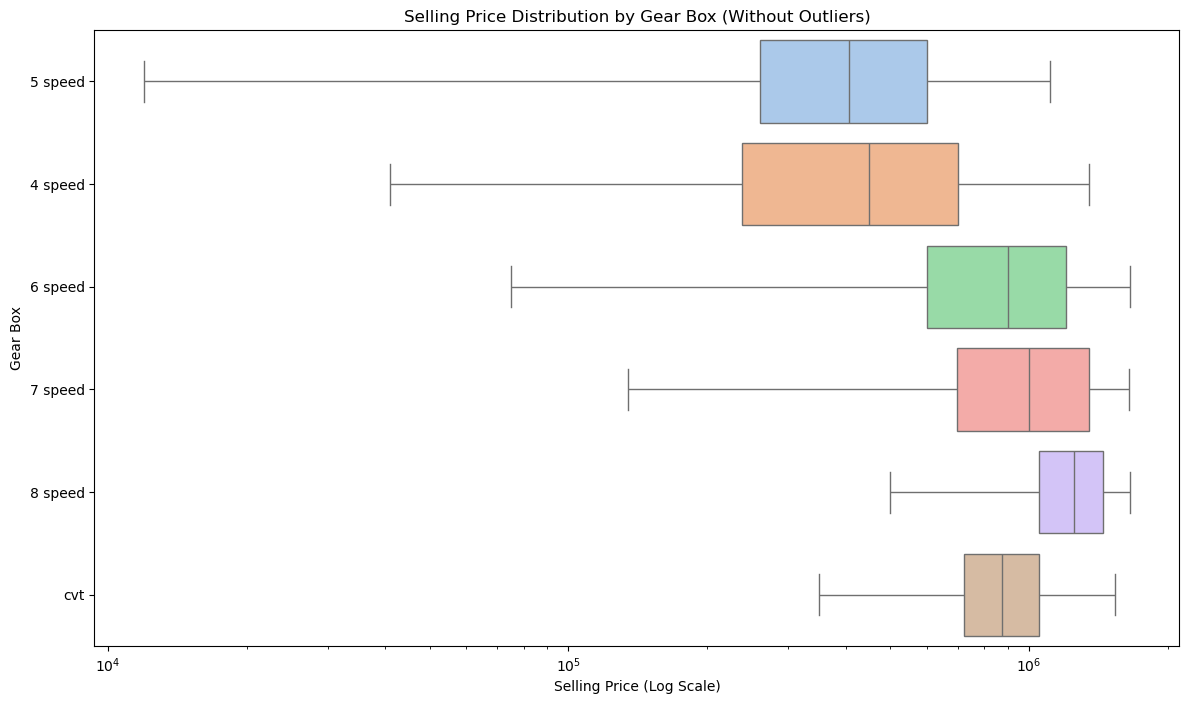

In [32]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['gear_box'].isin(topGearBoxs)], x="selling_price", y="gear_box", showfliers=False, palette=palatte)
plt.xscale("log")
plt.xlabel("Selling Price (Log Scale)")
plt.ylabel("Gear Box")
plt.title("Selling Price Distribution by Gear Box (Without Outliers)")
plt.show()

- 4 speed gear_box have higher price range.
- 8 speed gear_box have highest price range

In [34]:
seatsUniq = df['seats'].unique()
print(len(seatsUniq))
seatsUniq

11


array([ 5,  7,  2,  4,  6,  8,  9, 10, 13,  0, 14], dtype=int64)

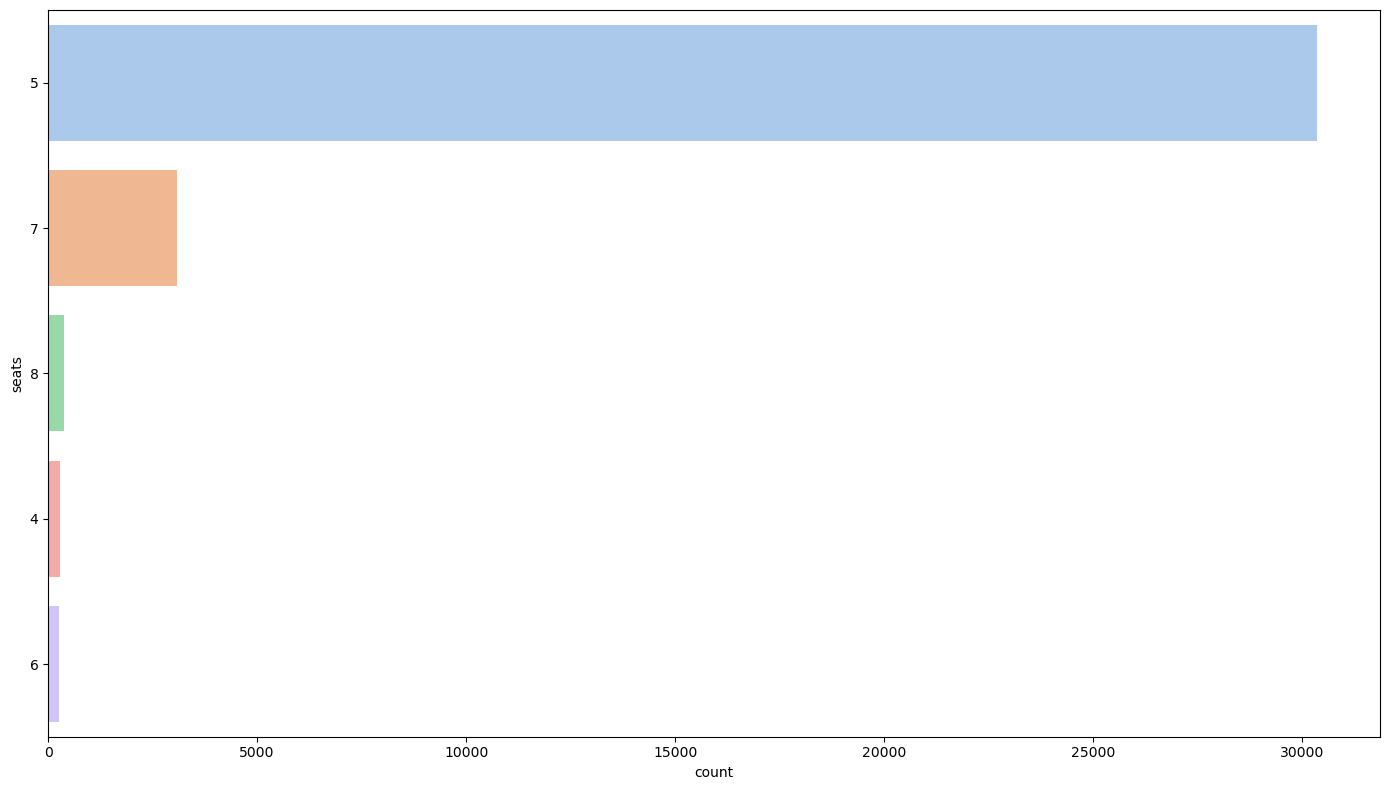

In [35]:
seatsCounts = df['seats'].value_counts()

topSeats = seatsCounts[seatsCounts > 50].index
plt.figure(figsize=(14, 8))
dfModelTop = df[df['seats'].isin(topSeats)]
sns.countplot(data=dfModelTop, y='seats', order=topSeats, palette=palatte)
plt.tight_layout()
plt.show()

- 5 and 7 steats are most used cars by customers

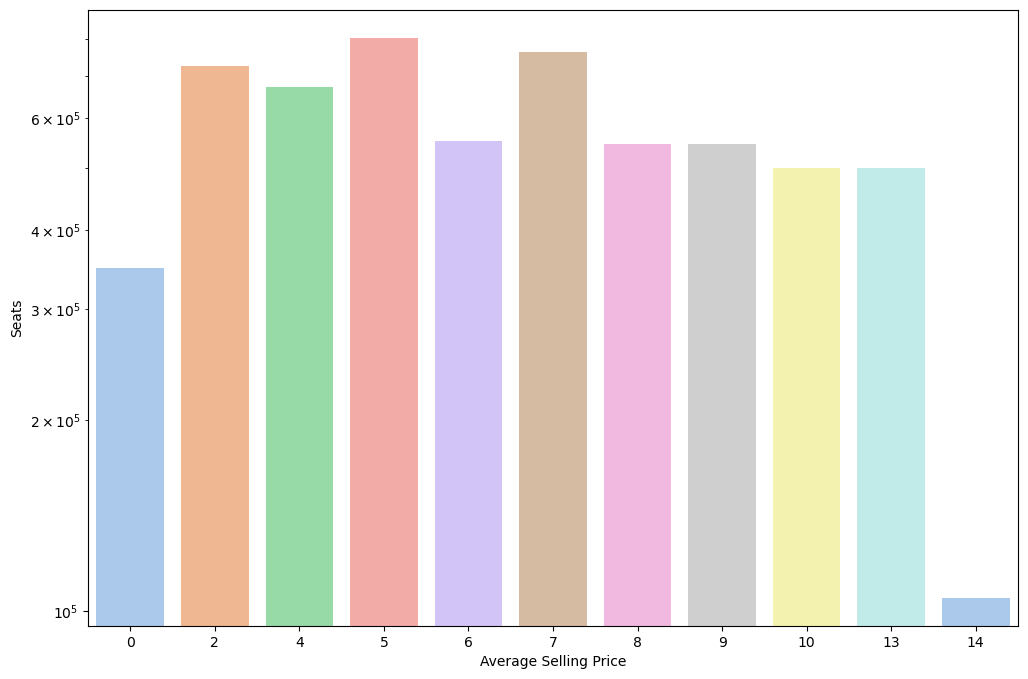

In [37]:
avgPriceBySeats = df.groupby("seats")["selling_price"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(y=avgPriceBySeats, x=seatsUniq, palette=palatte, errorbar=None)
plt.xlabel("Average Selling Price")
plt.ylabel("Seats")
plt.yscale("log")
plt.show()


In [38]:
steeringTypesUniq = df['steering_type'].unique()
print(len(steeringTypesUniq))
steeringTypesUniq

2


array(['power', 'manual'], dtype=object)

<Axes: xlabel='count', ylabel='steering_type'>

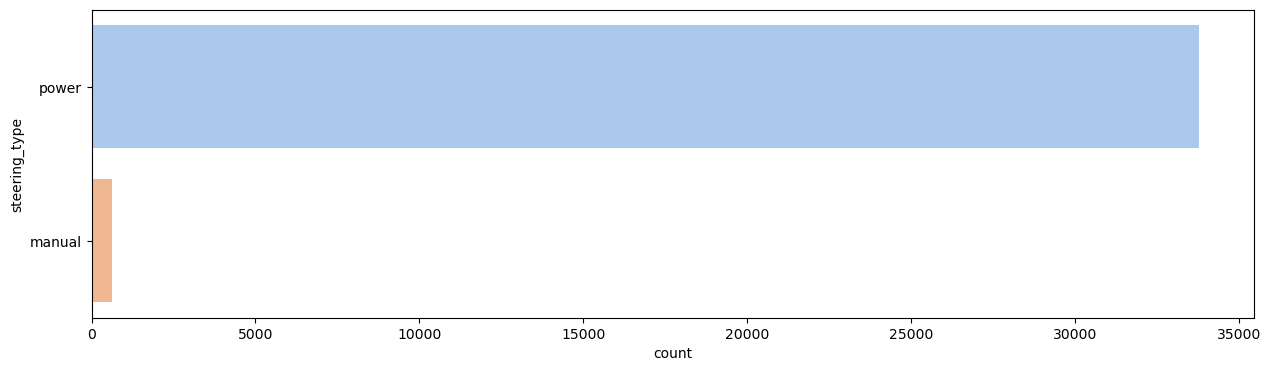

In [39]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, y='steering_type', palette=palatte)

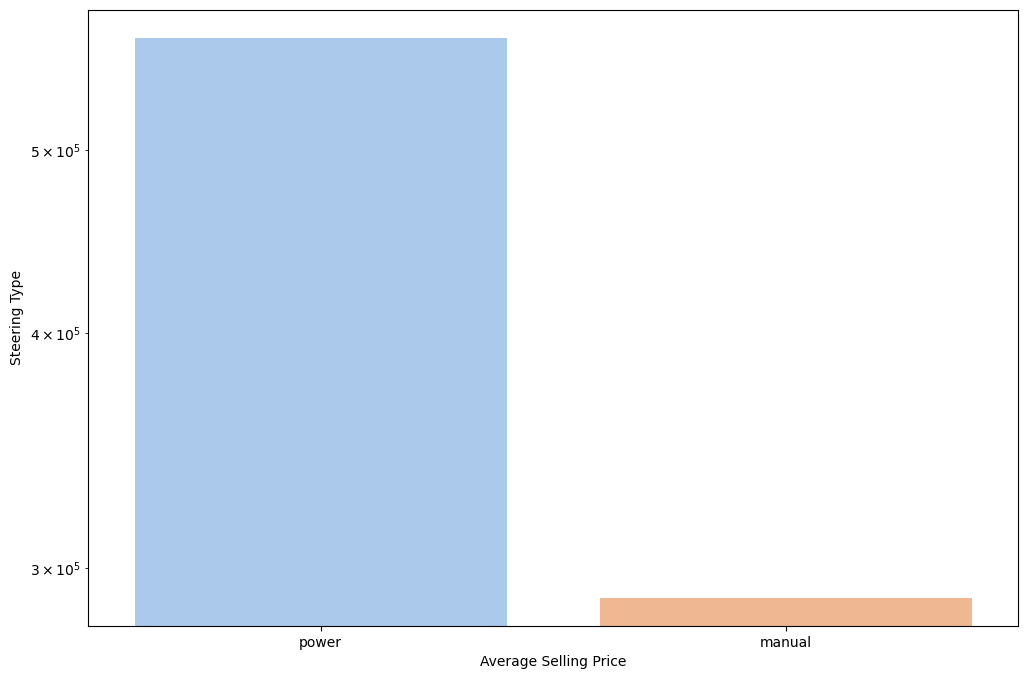

In [40]:
avgPriceBySteeringType = df.groupby("steering_type")["selling_price"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(y=avgPriceBySteeringType, x=steeringTypesUniq, palette=palatte, errorbar=None)
plt.xlabel("Average Selling Price")
plt.ylabel("Steering Type")
plt.yscale("log")
plt.show()


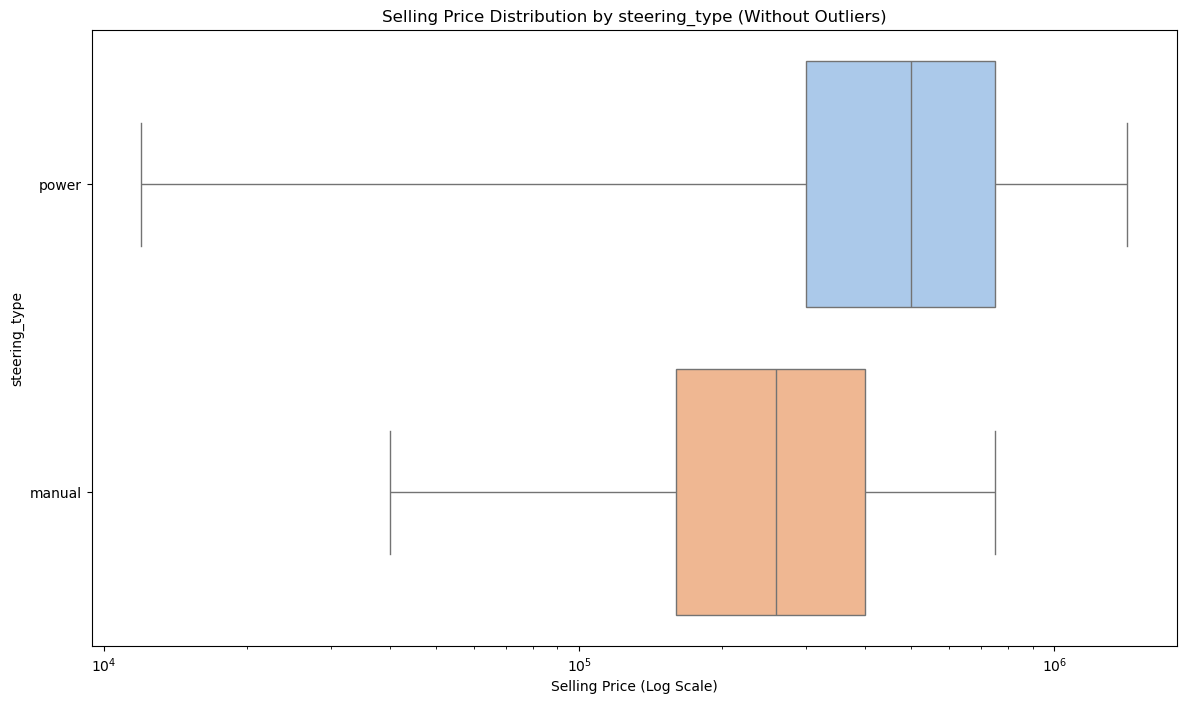

In [41]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="selling_price", y="steering_type", showfliers=False, palette=palatte)
plt.xscale("log")
plt.xlabel("Selling Price (Log Scale)")
plt.ylabel("steering_type")
plt.title("Selling Price Distribution by steering_type (Without Outliers)")
plt.show()

In [42]:
noOfCylinderUniq = df['no_of_cylinder'].unique()
print(len(noOfCylinderUniq))
noOfCylinderUniq

9


array([ 3,  4,  2,  1, 16,  7,  5,  8,  6], dtype=int64)

<Axes: xlabel='count', ylabel='no_of_cylinder'>

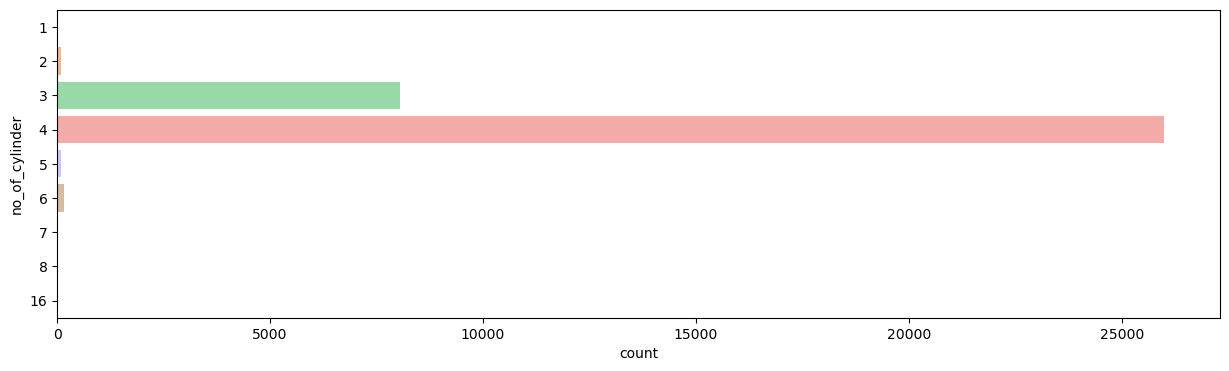

In [43]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, y='no_of_cylinder', palette=palatte)

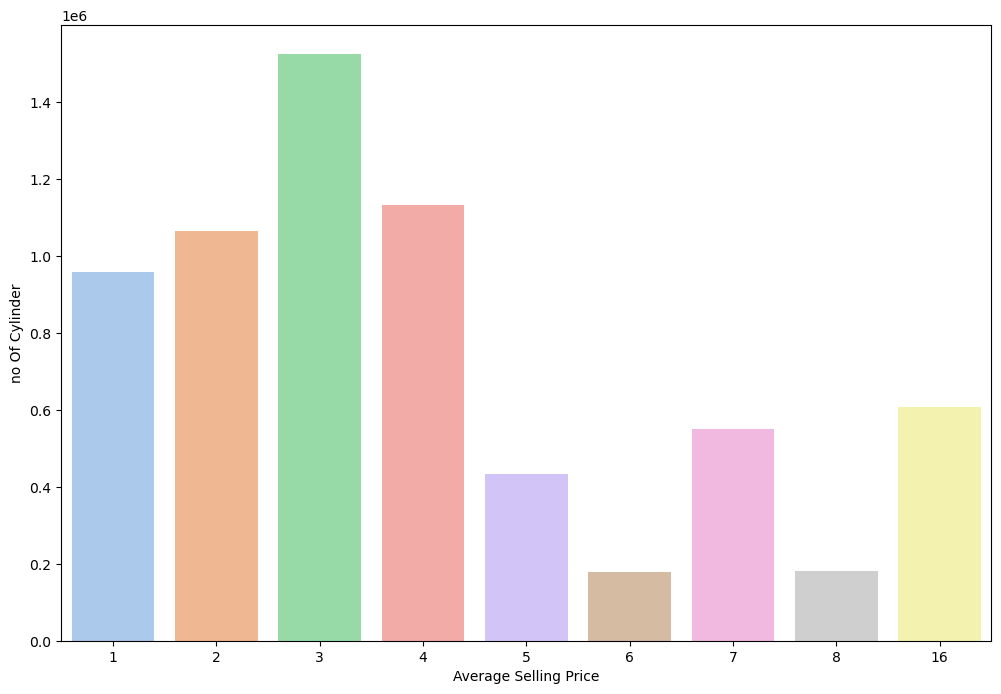

In [44]:
avgPriceByNoOfCylinder = df.groupby("no_of_cylinder")["selling_price"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(y=avgPriceByNoOfCylinder, x=noOfCylinderUniq, palette=palatte, errorbar=None)
plt.xlabel("Average Selling Price")
plt.ylabel("no Of Cylinder")
plt.show()

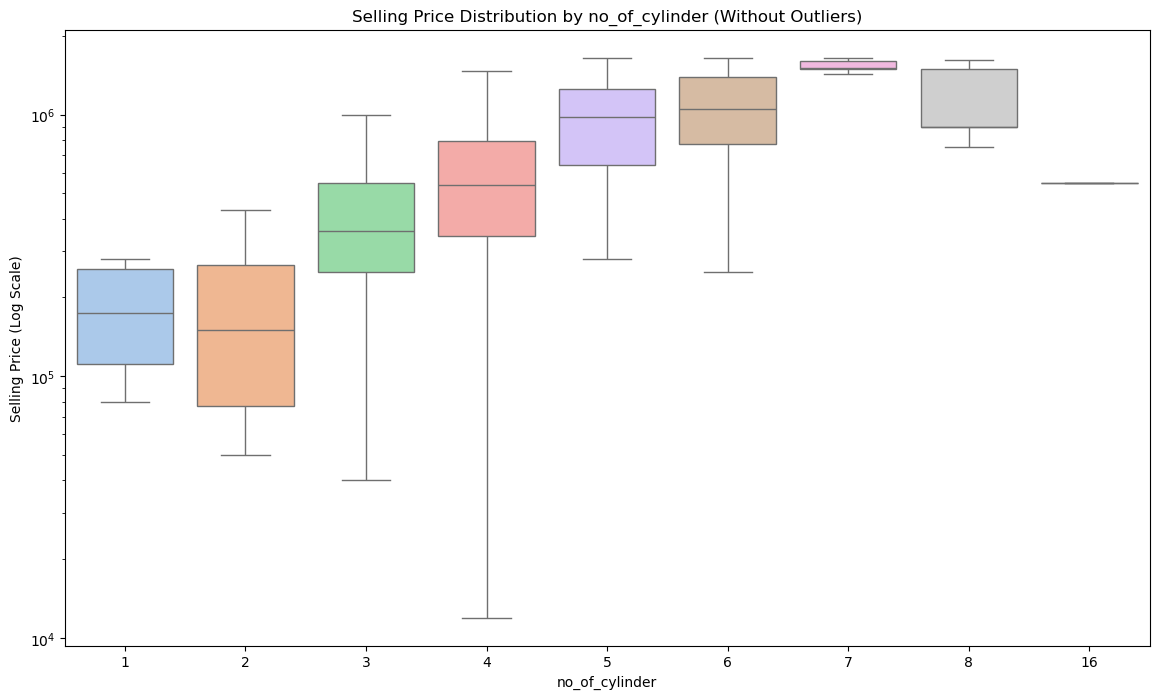

In [45]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, y="selling_price", x="no_of_cylinder", showfliers=False, palette=palatte)
plt.yscale("log")
plt.ylabel("Selling Price (Log Scale)")
plt.xlabel("no_of_cylinder")
plt.title("Selling Price Distribution by no_of_cylinder (Without Outliers)")
plt.show()

In [46]:
superChargerUniq = df['super_charger'].unique()
print(len(superChargerUniq))
superChargerUniq

2


array([False,  True])

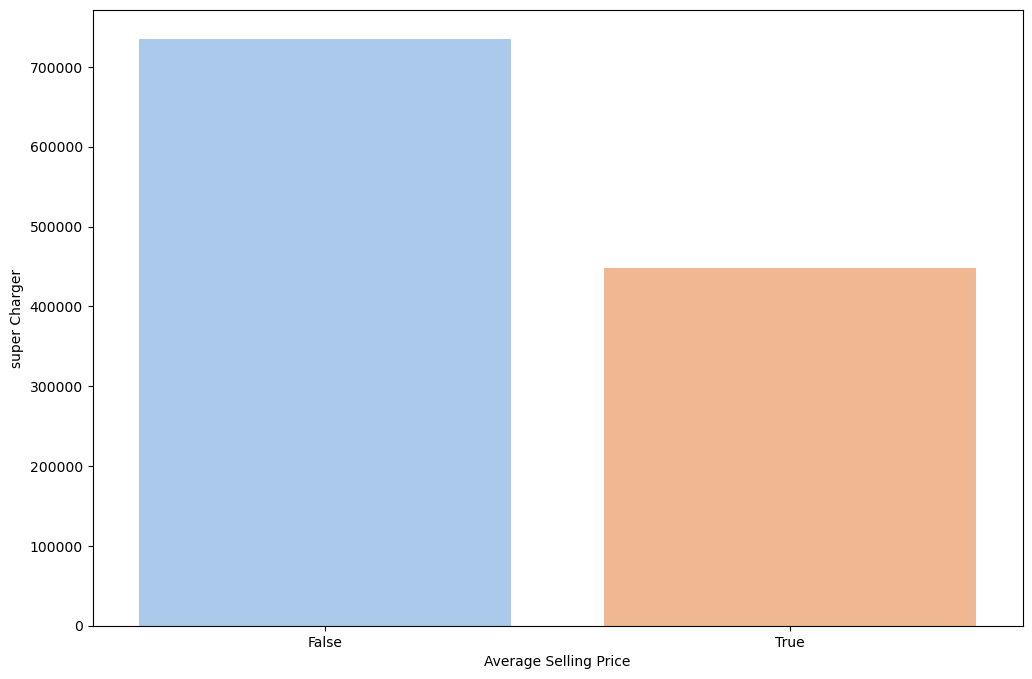

In [47]:
avgPriceBySuperChargerUniq = df.groupby("super_charger")["selling_price"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(y=avgPriceBySuperChargerUniq, x=superChargerUniq, palette=palatte, errorbar=None)
plt.xlabel("Average Selling Price")
plt.ylabel("super Charger")
plt.show()


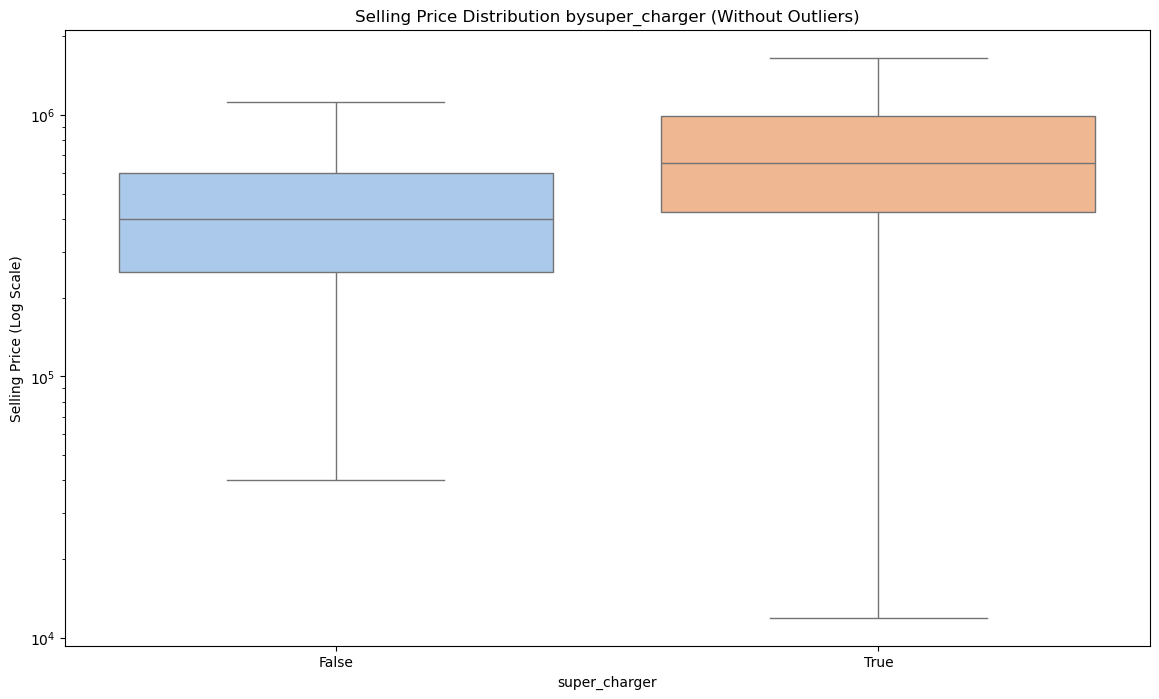

In [48]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, y="selling_price", x="super_charger", showfliers=False, palette=palatte)
plt.yscale("log")
plt.ylabel("Selling Price (Log Scale)")
plt.xlabel("super_charger")
plt.title("Selling Price Distribution bysuper_charger (Without Outliers)")
plt.show()

Index([165, 160, 190, 170, 172, 150, 180, 156, 195, 185], dtype='int64', name='top_speed')


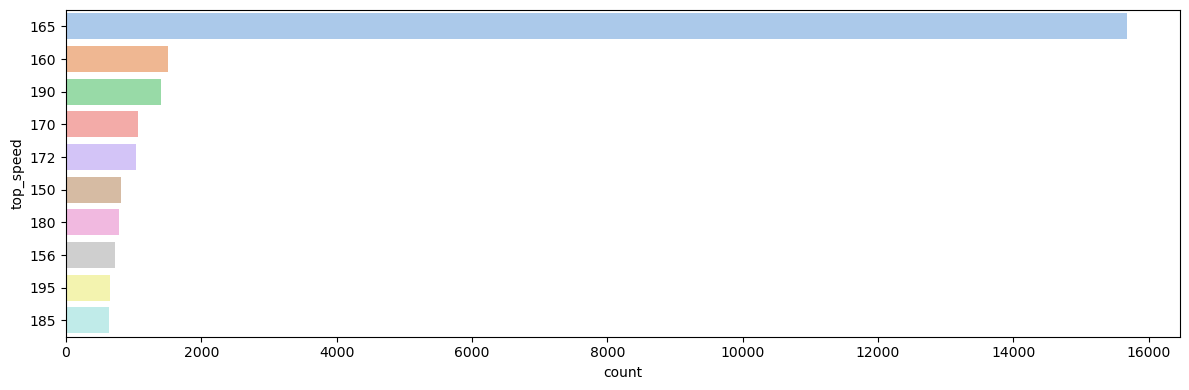

In [49]:
df['top_speed'].unique()
topSpeedCount = df['top_speed'].value_counts()
topSpeeds= topSpeedCount[:10].index
dfSpeedTop = df[df['top_speed'].isin(topSpeeds)]
print(topSpeeds)
plt.figure(figsize=(12, 4))
sns.countplot(y='top_speed', data=dfSpeedTop, palette=palatte, order=topSpeeds)
plt.tight_layout()
plt.show()

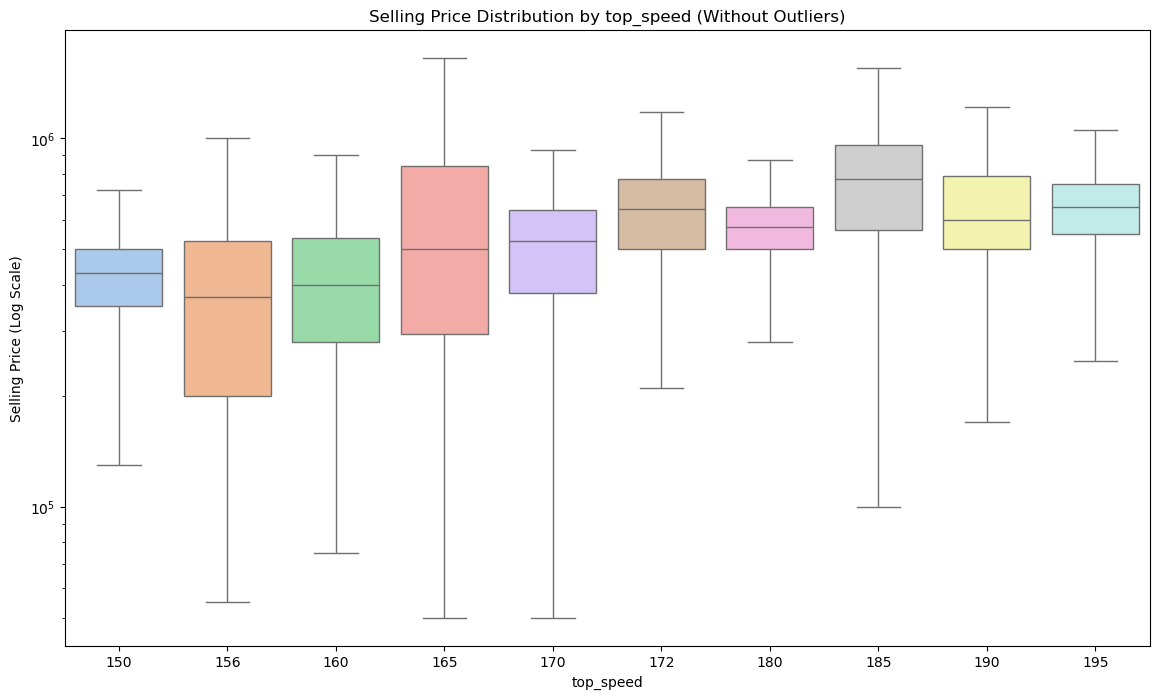

In [50]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=dfSpeedTop, y="selling_price", x="top_speed", showfliers=False, palette=palatte)
plt.yscale("log")
plt.ylabel("Selling Price (Log Scale)")
plt.xlabel("top_speed")
plt.title("Selling Price Distribution by top_speed (Without Outliers)")
plt.show()

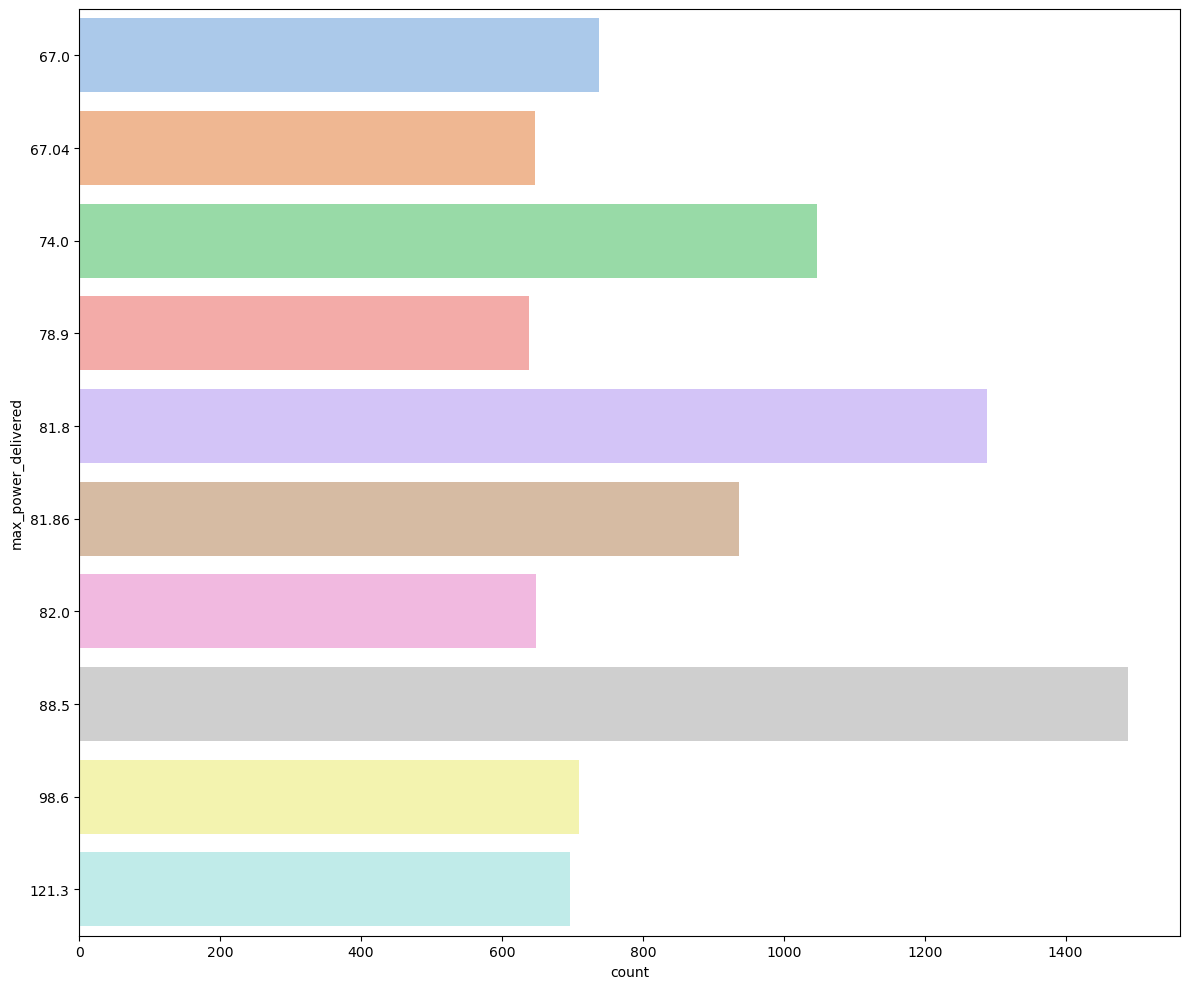

In [96]:
uniqMX = df['max_power_delivered'].unique()
PDCount = df['max_power_delivered'].value_counts()
PDInd = PDCount.index.tolist()
PD = PDInd[:10]
dfPDTop = df[df['max_power_delivered'].isin(PD)]
plt.figure(figsize=(12, 10))
sns.countplot(y='max_power_delivered', data=dfPDTop, palette=palatte )
plt.tight_layout()
plt.show()

max_power_delivered
88.50     1488
81.80     1288
74.00     1047
81.86      937
67.00      738
          ... 
85.82        1
450.00       1
66.08        1
355.00       1
109.00       1
Name: count, Length: 442, dtype: int64

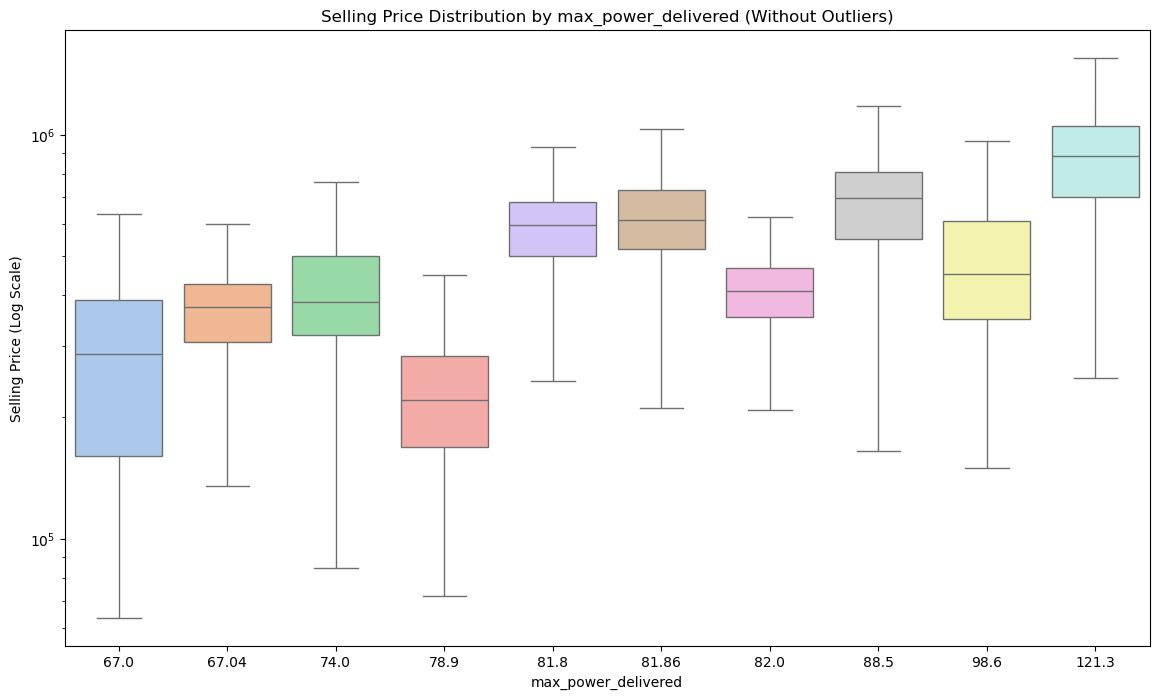

In [102]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=dfPDTop, y="selling_price", x="max_power_delivered", showfliers=False, palette=palatte)
plt.yscale("log")
plt.ylabel("Selling Price (Log Scale)")
plt.xlabel("max_power_delivered")
plt.title("Selling Price Distribution by max_power_delivered (Without Outliers)")
plt.show()

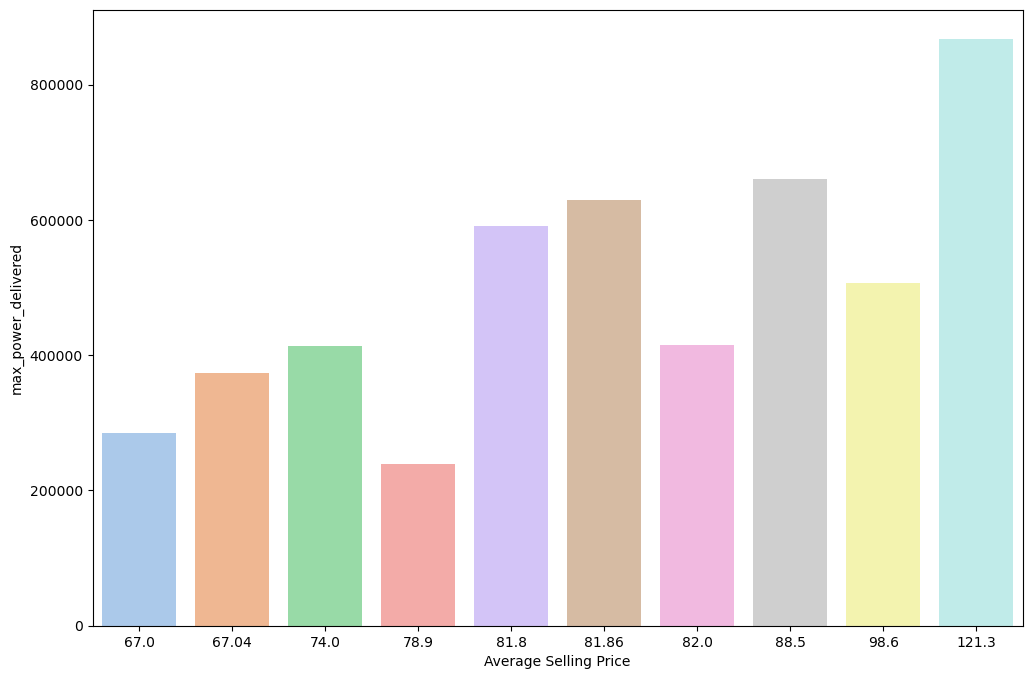

In [132]:
avgPriceByMXUniq = df.groupby("max_power_delivered")["selling_price"].mean().sort_values(ascending=False)
avgPriceByMXUniqMn = avgPriceByMXUniq[avgPriceByMXUniq.index.isin(PD)]
plt.figure(figsize=(12, 8))
sns.barplot(y=avgPriceByMXUniqMn, x=avgPriceByMXUniqMn.index, palette=palatte, errorbar=None)
plt.xlabel("Average Selling Price")
plt.ylabel("max_power_delivered")
plt.show()


299


<Axes: xlabel='count', ylabel='max_torque_delivered'>

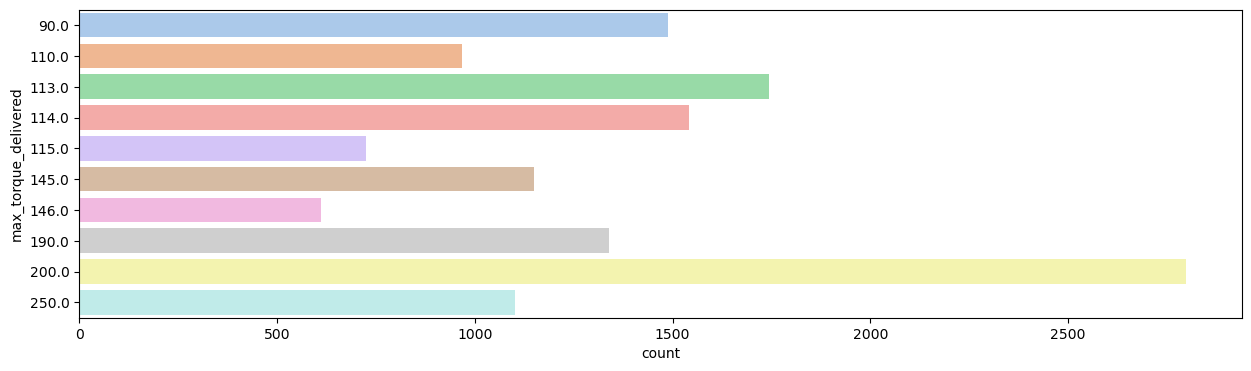

In [146]:
torqueUniq = df['max_torque_delivered'].unique()
print(len(torqueUniq))
torque = df['max_torque_delivered'].value_counts()
torqueInd= torque.index.tolist()[:10]
torqueMn = df[df['max_torque_delivered'].isin(torqueInd)]
plt.figure(figsize=(15, 4))
sns.countplot(data=torqueMn, y='max_torque_delivered', palette=palatte)

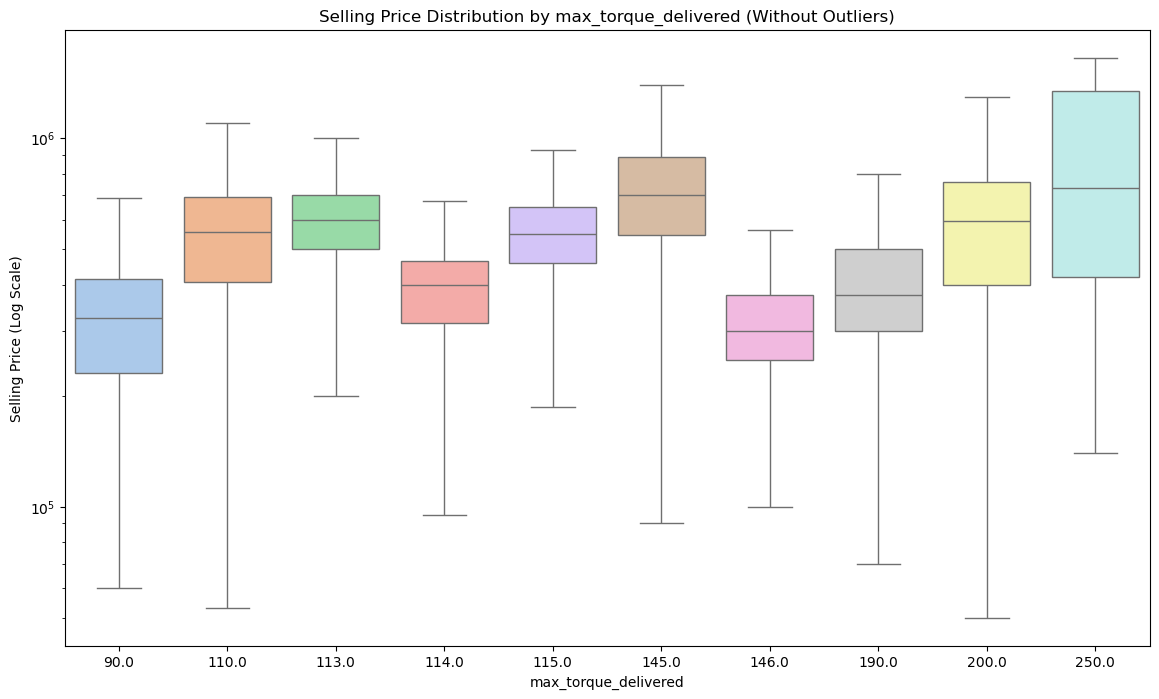

In [148]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=torqueMn, y="selling_price", x="max_torque_delivered", showfliers=False, palette=palatte)
plt.yscale("log")
plt.ylabel("Selling Price (Log Scale)")
plt.xlabel("max_torque_delivered")
plt.title("Selling Price Distribution by max_torque_delivered (Without Outliers)")
plt.show()

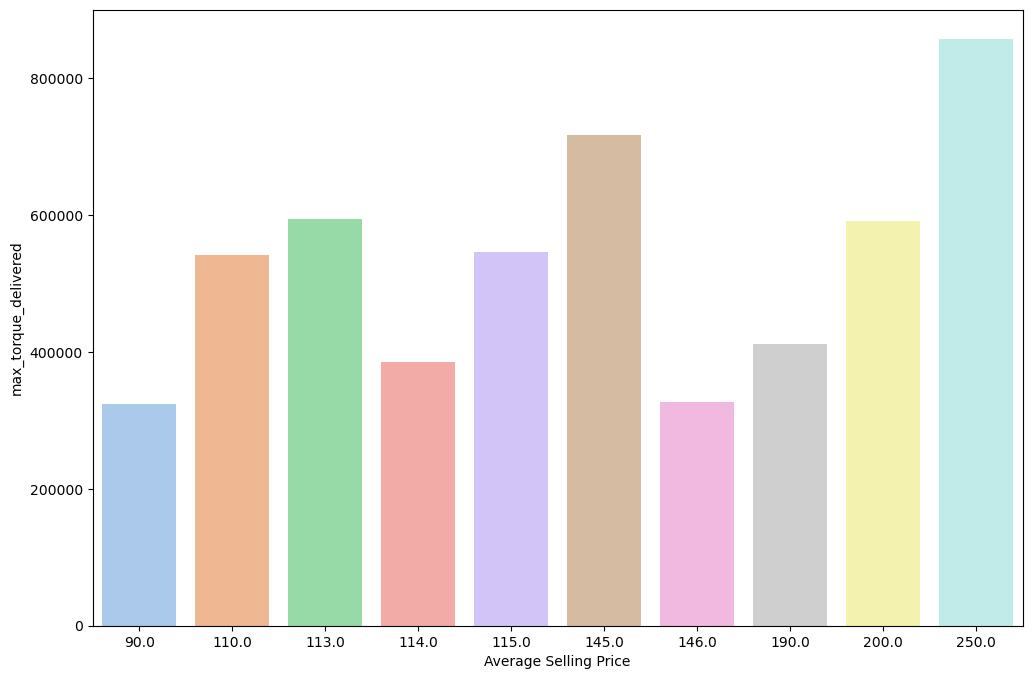

In [152]:
avgPriceByMXTUniq = df.groupby("max_torque_delivered")["selling_price"].mean().sort_values(ascending=False)
avgPriceByMXUniqMn = avgPriceByMXTUniq[avgPriceByMXTUniq.index.isin(torqueInd)]
plt.figure(figsize=(12, 8))
sns.barplot(y=avgPriceByMXUniqMn, x=avgPriceByMXUniqMn.index, palette=palatte, errorbar=None)
plt.xlabel("Average Selling Price")
plt.ylabel("max_torque_delivered")
plt.show()


feature_score
24    8563
23    6764
22    5204
21    3402
20    2586
19    2102
25    1477
17    1196
18    1068
16     413
Name: count, dtype: int64


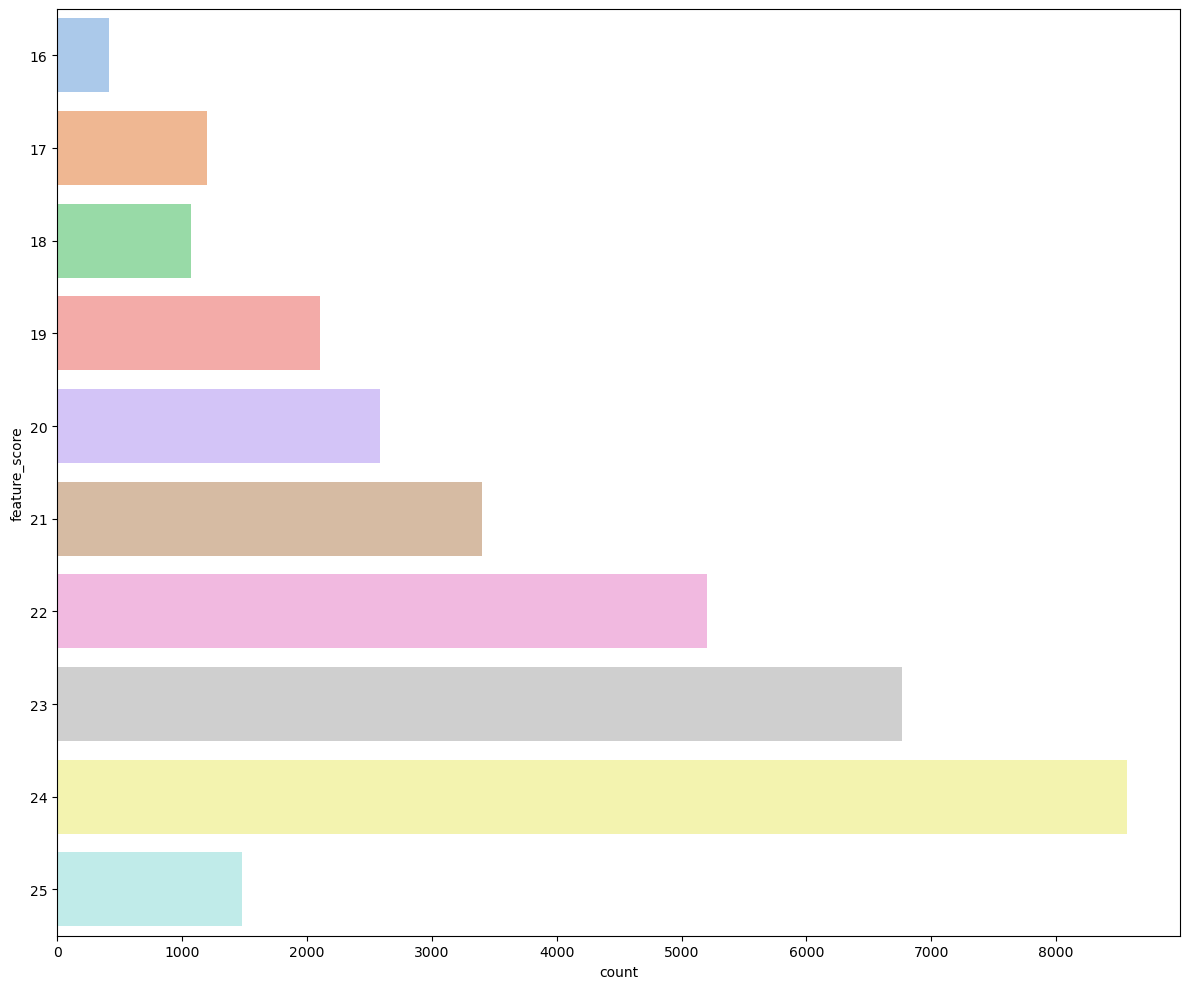

In [184]:
uniqFS = df['feature_score'].unique()
FSCount = df['feature_score'].value_counts()
FSTop = FSCount[:10]
print(FSTop)
FSTopDf = df[df['feature_score'].isin(FSTop.index)]
len(FSTopDf)
plt.figure(figsize=(12, 10))
sns.countplot(y='feature_score', data=FSTopDf, palette=palatte )
plt.tight_layout()
plt.show()

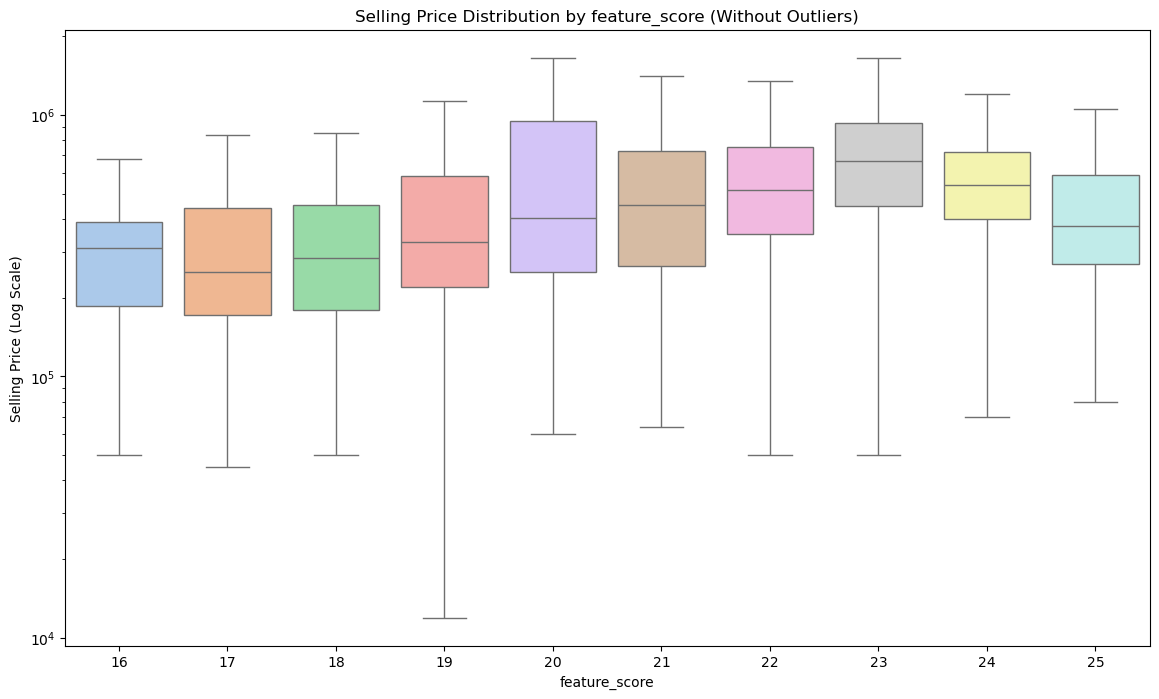

In [186]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=FSTopDf, y="selling_price", x="feature_score", showfliers=False, palette=palatte)
plt.yscale("log")
plt.ylabel("Selling Price (Log Scale)")
plt.xlabel("feature_score")
plt.title("Selling Price Distribution by feature_score (Without Outliers)")
plt.show()

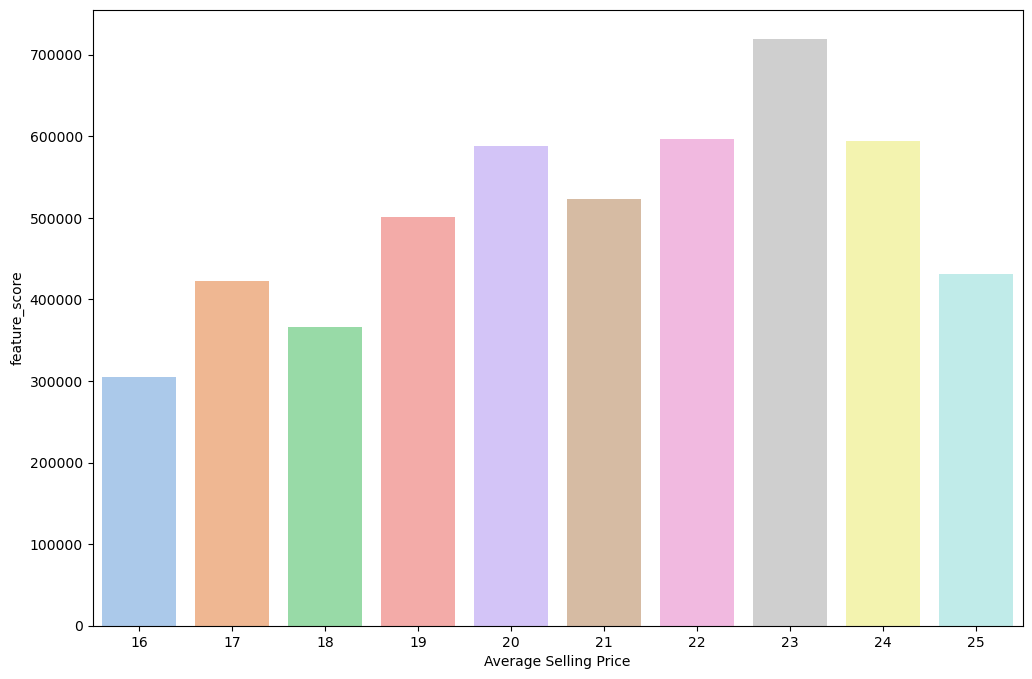

In [190]:
avgPriceByFSUniq = df.groupby("feature_score")["selling_price"].mean().sort_values(ascending=False)
avgPriceByFSUniqMn = avgPriceByFSUniq[avgPriceByFSUniq.index.isin(FSTop.index)]
# print(avgPriceByFSUniqMn, avgPriceByFSUniq)
plt.figure(figsize=(12, 8))
sns.barplot(y=avgPriceByFSUniqMn, x=avgPriceByFSUniqMn.index, palette=palatte, errorbar=None)
plt.xlabel("Average Selling Price")
plt.ylabel("feature_score")
plt.show()

## feature selection approches 
- Correlation Coefficient (for numeric features)
- Chi-Square Test (for categorical features)
- ANOVA (F-test) (for categorical inputs and continuous output)